___
### Notebook 3 - Machine Learning Models
___

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
# Clearing up memory
import gc

# Featuretools for automated feature engineering
import featuretools as ft
ft.__version__

'0.2.1'

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df_kaggle = pd.read_csv('Cleaned_Application_Data.csv')
print(df_kaggle.shape)
desc = df_kaggle.describe(include='all').T
desc['percent_missing'] = (df_kaggle['TARGET'].size - desc['count'])*100/df_kaggle['TARGET'].size
desc = desc[desc['count']<df_kaggle['TARGET'].size][['count','percent_missing']]
print("Cleaned_Application_Data has {} columns with missing data out of total {} columns".format(desc.shape[0], 
      df_kaggle.columns.size))
df_kaggle.head()

(356255, 127)
Cleaned_Application_Data has 0 columns with missing data out of total 127 columns


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_EXT_SOURCE_1,FLAG_EXT_SOURCE_2,FLAG_EXT_SOURCE_3,FLAG_SOCIAL_CIRCLE_AVAILABLE,FLAG_CREDIT_BUREAU_CHECK
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Y,Y,Y,Y,Y
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.000000,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Y,Y,N,Y,Y
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.000000,0.

Above output suggests that there is no missing data in the df_kaggle dataset.

In [5]:
feature_matrix = pd.read_csv('feature_matrix.csv')
print(feature_matrix.shape)
feature_matrix.head()

(356255, 579)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,SUM(bureau.DAYS_CREDIT),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.DAYS_ENDDATE_FACT),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM_LIMIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),SUM(bureau.DAYS_CREDIT_UPDATE),SUM(bureau.AMT_ANNUITY),MAX(bureau.DAYS_CREDIT),MAX(bureau.CREDIT_DAY_OVERDUE),MAX(bureau.DAYS_CREDIT_ENDDATE),MAX(bureau.DAYS_ENDDATE_FACT),MAX(bureau.AMT_CREDIT_MAX_OVERDUE),MAX(bureau.CNT_CREDIT_PROLONG),MAX(bureau.AMT_CREDIT_SUM),MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(bureau.AMT_CREDIT_SUM_LIMIT),MAX(bureau.AMT_CREDIT_SUM_OVERDUE),MAX(bureau.DAYS_CREDIT_UPDATE),MAX(bureau.AMT_ANNUITY),MEAN(bureau.DAYS_CREDIT),MEAN(bureau.CREDIT_DAY_OVERDUE),MEAN(bureau.DAYS_CREDIT_ENDDATE),MEAN(bureau.DAYS_ENDDATE_FACT),MEAN(bureau.AMT_CREDIT_MAX_OVERDUE),MEAN(bureau.CNT_CREDIT_PROLONG),MEAN(bureau.AMT_CREDIT_SUM),MEAN(bureau.AMT_CREDIT_SUM_DEBT),MEAN(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(bureau.DAYS_CREDIT_UPDATE),MEAN(bureau.AMT_ANNUITY),COUNT(bureau),SUM(prev_app.AMT_ANNUITY),SUM(prev_app.AMT_APPLICATION),SUM(prev_app.AMT_CREDIT),SUM(prev_app.AMT_DOWN_PAYMENT),SUM(prev_app.AMT_GOODS_PRICE),SUM(prev_app.HOUR_APPR_PROCESS_START),SUM(prev_app.NFLAG_LAST_APPL_IN_DAY),SUM(prev_app.RATE_DOWN_PAYMENT),SUM(prev_app.RATE_INTEREST_PRIMARY),SUM(prev_app.RATE_INTEREST_PRIVILEGED),SUM(prev_app.DAYS_DECISION),SUM(prev_app.SELLERPLACE_AREA),SUM(prev_app.CNT_PAYMENT),SUM(prev_app.DAYS_FIRST_DRAWING),SUM(prev_app.DAYS_FIRST_DUE),SUM(prev_app.DAYS_LAST_DUE_1ST_VERSION),SUM(prev_app.DAYS_LAST_DUE),SUM(prev_app.DAYS_TERMINATION),SUM(prev_app.NFLAG_INSURED_ON_APPROVAL),MAX(prev_app.AMT_ANNUITY),MAX(prev_app.AMT_APPLICATION),MAX(prev_ap

In [6]:
cols_df_kaggle = df_kaggle.columns
cols_df_kaggle = cols_df_kaggle.drop('SK_ID_CURR')
cols_feature_matrix = feature_matrix.columns
cols_common = list(set(cols_df_kaggle).intersection(cols_feature_matrix))
# Remove the columns from feature_matrix dataset that are present in both the datasets 
feature_matrix.drop(cols_common, axis=1, inplace=True)
# Merge the two dataset into a single dataset
df_kaggle = df_kaggle.merge(feature_matrix, on='SK_ID_CURR')
print(df_kaggle.shape)

(356255, 584)


In [7]:
desc = df_kaggle.describe(include='all').T
desc['percent_missing'] = (df_kaggle['TARGET'].size - desc['count'])*100/df_kaggle['TARGET'].size
desc = desc[desc['count']<df_kaggle['TARGET'].size][['count','percent_missing']]
print("The combined dataset has {} columns with missing data out of total {} columns".format(desc.shape[0], 
      df_kaggle.columns.size))

The combined dataset has 451 columns with missing data out of total 584 columns


In [7]:
# Since the original df_kaggle dataset has no missing information and then when it was combined with the 
#   dataset obtained from deep feature synthesis process, some missing data was introduced.
# Since deep feature synthesis produced just max, min and mean data which means all the data is numeric
# Missing would mean that in the dataset using which the data was generated was not having data corresponding 
#   to the defined relationship between the application dataset and that file.
# So we can safely fill all the missing information in this dataset with zeros.
df_kaggle.fillna(0, inplace=True)

In [8]:
# Perform one-hot encoding
df_kaggle_onehot = pd.get_dummies(df_kaggle)
print('Kaggle dataset shape before and after onehot', df_kaggle.shape, df_kaggle_onehot.shape)

Kaggle dataset shape before and after onehot (356255, 584) (356255, 716)


In [9]:
# Separate the Kaggle train and kaggle test datasets from df_kaggle dataset
df_kaggle_train = df_kaggle_onehot[df_kaggle_onehot.TARGET !=- 1]
df_kaggle_test = df_kaggle_onehot[df_kaggle_onehot.TARGET == -1]
print(df_kaggle_train.shape, df_kaggle_test.shape)

(307511, 716) (48744, 716)


# Dataset Preprocessing before Data Modelling
* Standard scalar method
* Min Max Scalar
* Max Mean Scalar

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

# For PCA and scalar transfer, since missing values cause errors, fill missing values with 0 in the dataset
df_kaggle_train.fillna(0, inplace=True)

# Separate dependent and response variables
Y = df_kaggle_train.TARGET.values
Y = Y.reshape((Y.size, 1))
X = df_kaggle_train.drop(['TARGET', 'SK_ID_CURR'], axis=1).values
X_std = StandardScaler().fit_transform(X)
X_minMax = MinMaxScaler().fit_transform(X)
X_maxAbs = MaxAbsScaler().fit_transform(X)

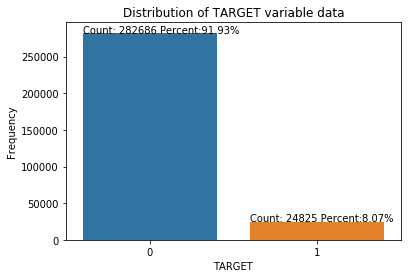

In [11]:
import seaborn as sns
# sns.countplot(data=df_kaggle_train, x='TARGET')
ax = sns.countplot(data=df_kaggle_train , x="TARGET")
ax.set(ylabel="Frequency")
for p in ax.patches:
        ax.annotate('Count: {:.0f}'.format(p.get_height()) + ' Percent:' + '{:.2f}%'.format(p.get_height()/df_kaggle_train['TARGET'].size * 100),
                    (p.get_x(), p.get_height()+50))
ax.set_title("Distribution of TARGET variable data")
plt.show()

The above figure suggests that the dataset is highly imbalanced which is very crutial information to keep in mind before building the models.

# Dimension reduction
## PCA

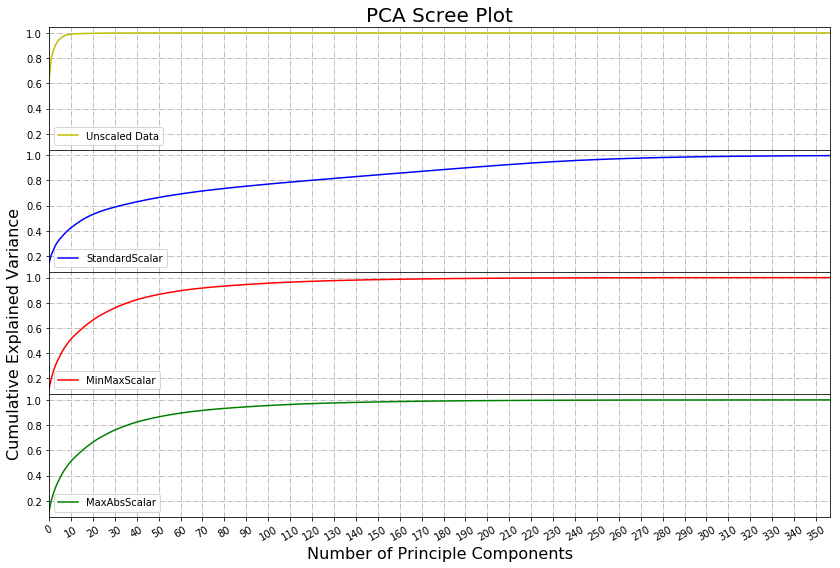

In [13]:
from sklearn.decomposition import PCA
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True, figsize=(14, 9))

plt.xlim((0,(X_std.shape[1]-1)/2))
plt.xticks(np.arange(0, (X_std.shape[1]-1)/2, 10), rotation=30)
plt.xlabel('Number of Principle Components', fontsize=16)
pca=PCA()
pca.fit(X)
ax1.grid(linestyle='-.')
ax1.plot(np.cumsum(pca.explained_variance_ratio_), 'y-', label='Unscaled Data');
ax1.legend(loc="lower left")
pca_std = PCA()
pca_std.fit(X_std)
ax2.grid(linestyle='-.')
ax2.plot(np.cumsum(pca_std.explained_variance_ratio_), 'b-', label='StandardScalar');
ax2.legend(loc="lower left")
pca_minMax = PCA()
pca_minMax.fit(X_minMax)
ax3.grid(linestyle='-.')
ax3.plot(np.cumsum(pca_minMax.explained_variance_ratio_), 'r-', label='MinMaxScalar');
ax3.set_ylabel('Cumulative Explained Variance', fontsize=16)
ax3.legend(loc="lower left")
pca_maxAbs = PCA()
pca_maxAbs.fit(X_maxAbs)
ax4.grid(linestyle='-.')
ax4.plot(np.cumsum(pca_maxAbs.explained_variance_ratio_), 'g-', label='MaxAbsScalar');
ax4.legend(loc="lower left")
ax1.set_title('PCA Scree Plot', fontsize=20)
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

From above figure, we choose 8 PCA components for unscaled data, 110 PCA components for StandardScalar and 35 PCA components for both MinMaxScalar and MaxAbsScalar. This choice was made to choose number of principle components that could explain 80% of the variance in the dataset.

# Classification evaluation function

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy
import pandas as pd
import itertools

def classification_evaluation(y_actual, y_prediction, y_prediction_prob, pr_roc_ind=1):
    """
    Implementation of classification_evaluation which is for implementaion of creation of confusion matrix and 
    ROC/PR curve.
        
    Arguments:
    y_actual -- Actual values of the variable to be predicted
    y_prediction -- Predicted values of the variable to be predicted
    y_prediction_prob -- Prediction probabilities with predicted values of the variable to be predicted
    pr_roc_ind -- Indicator to determine whether to create PR curve or ROC curve. If 1 then PR curve else ROC curve.
       
    Returns:
    """
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_actual, y_prediction)
    np.set_printoptions(precision=2)
    print("Detailed classification report:\n")
    print(classification_report(y_actual, y_prediction))
    print('Accuracy:', accuracy_score(y_actual, y_prediction))
    print('Weighted F1 score:', f1_score(y_actual, y_prediction, average='weighted'))
    
    fig, ax = plt.subplots(1,2, figsize=(14, 6))
    # Plot confusion matrix
    ax[0] = plot_confusion_matrix(cnf_matrix, classes=[0,1], threshold=0.5, plt_axis=ax[0])
    ax[0].set_title('Confusion Matrix')

    if pr_roc_ind==1:
        # calculate the fpr and tpr for all thresholds of the classification
        precision, recall, threshold = precision_recall_curve(y_actual, y_prediction_prob[:,1])
        # Plot PR Curve    
        ax[1] = plot_precision_recall_curve(precision, recall, plt_axis=ax[1])
        average_precision = average_precision_score(y_actual, y_prediction)
        ax[1].set_title("PR Curve:Average precision-recall score: {0:0.2f}".format(average_precision) )
    
    else:
        # calculate the fpr and tpr for all thresholds of the classification
        fpr, tpr, threshold = roc_curve(y_actual, y_prediction_prob[:,1])
        # Plot ROC Curve    
        ax[1] = plot_roc_curve(fpr, tpr, plt_axis=ax[1])
        ax[1].set_title("ROC Curve")
    
    plt.subplots_adjust( wspace=0.2)
    plt.show()
    
def plot_confusion_matrix(cm, classes, plt_axis, 
                          threshold = 0,
                          cmap=plt.cm.Blues ):
    """
    This function prints and plots the confusion matrix.
    """
    cm1 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.sca(plt_axis)
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' 
    thresh = cm1.max() / 4 if threshold==0 else threshold
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt_axis.text(j, i, format(cm[i, j], fmt)+'\nNormalized:' + format(cm1[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm1[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt_axis

def plot_roc_curve(fpr, tpr, plt_axis):
    roc_auc = auc(fpr, tpr) # Area under curve
    plt.sca(plt_axis)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt_axis

def plot_precision_recall_curve(precision, recall, plt_axis):
    pr_auc = auc(recall, precision) # Area under curve
    plt.sca(plt_axis)
    plt.step(recall, precision, color='b', alpha=0.2, where='post', label = 'AUC = %0.2f' % pr_auc)
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.legend(loc = 'lower right')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    return plt_axis

# Logestic Regression With PCA
<b>1. UnScaled Input dataset</b>

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
LogisticRegression()


Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.94      0.37      0.53     56538
          1       0.09      0.72      0.16      4965

avg / total       0.87      0.39      0.50     61503

Accuracy: 0.3938344471001415
Weighted F1 score: 0.49629478688171047


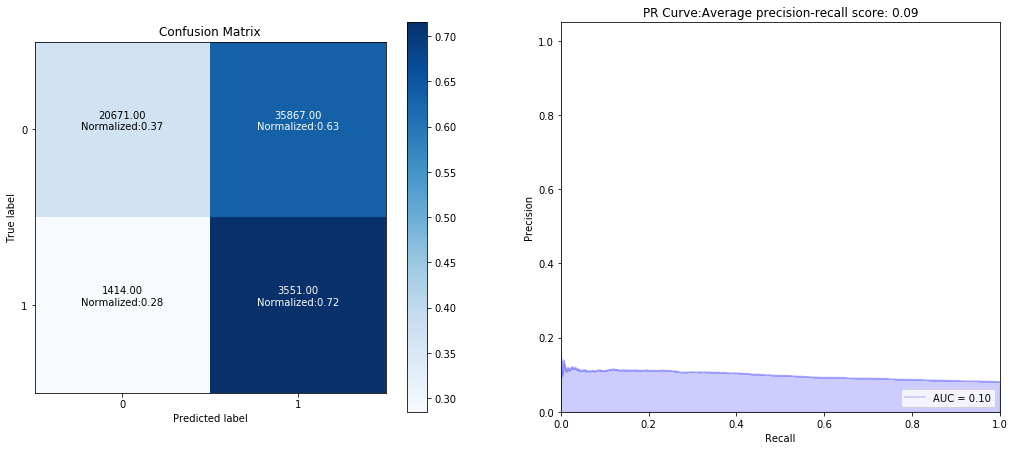

Cross Validation Execution :  2
Detailed classification report:

             precision    recall  f1-score   support

          0       0.94      0.36      0.52     56538
          1       0.09      0.73      0.16      4965

avg / total       0.87      0.39      0.49     61503

Accuracy: 0.3911353917695072
Weighted F1 score: 0.49294686014822414


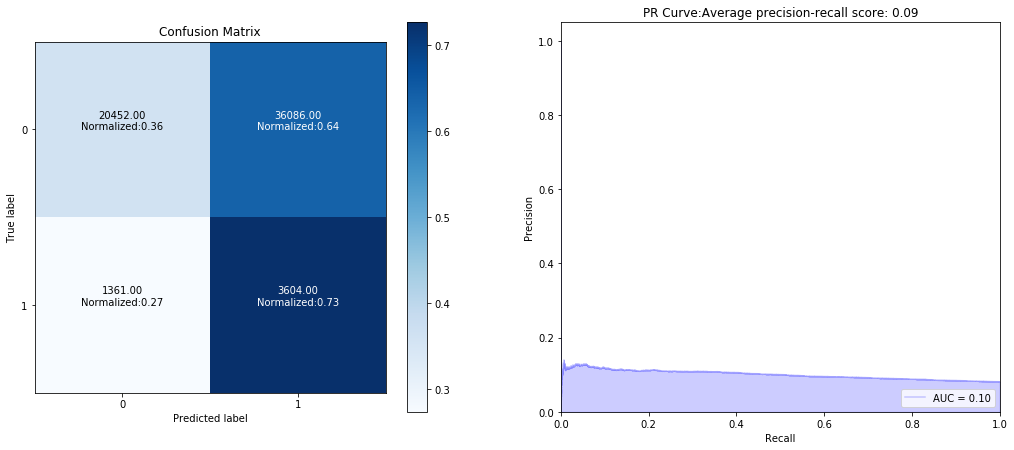

Cross Validation Execution :  3
Detailed classification report:

             precision    recall  f1-score   support

          0       0.94      0.37      0.53     56538
          1       0.09      0.73      0.16      4965

avg / total       0.87      0.40      0.50     61503

Accuracy: 0.39526527161276687
Weighted F1 score: 0.4974196231052722


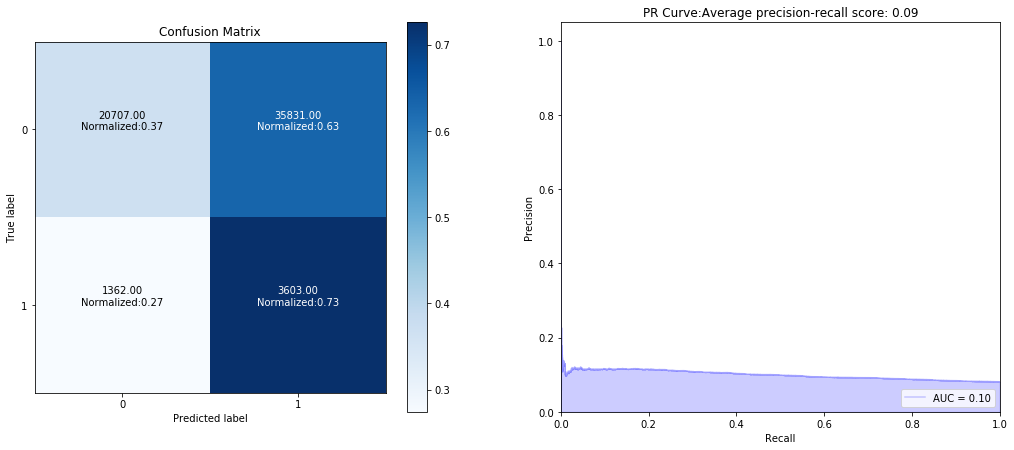

Execution time:  100.55573600000002  seconds


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
import time

start_time = time.clock()

pca = PCA(n_components=8)
# Logistic regression with balanced class_weight as the dataset is highly imbalanced
cls = LogisticRegression(class_weight='balanced') 

pipe = Pipeline([('pca', pca), ('logistic', cls)])


sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X, Y):
    X_train = X[train_index]
    Y_train = Y[train_index]
    X_test = X[test_index]
    Y_test = Y[test_index]
    pipe.fit(X_train, Y_train.ravel())
    predictions = pipe.predict(X_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_test)
    print("Cross Validation Execution : ", count)
    count = count + 1
    classification_evaluation(Y_test, predictions, pred_prob)
print("Execution time: ", time.clock() - start_time, " seconds")

<b>2. ScandardScaled Input dataset</b>


Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.96      0.67      0.79     56538
          1       0.15      0.67      0.25      4965

avg / total       0.89      0.67      0.75     61503

Accuracy: 0.670113652992537
Weighted F1 score: 0.7450556110016394


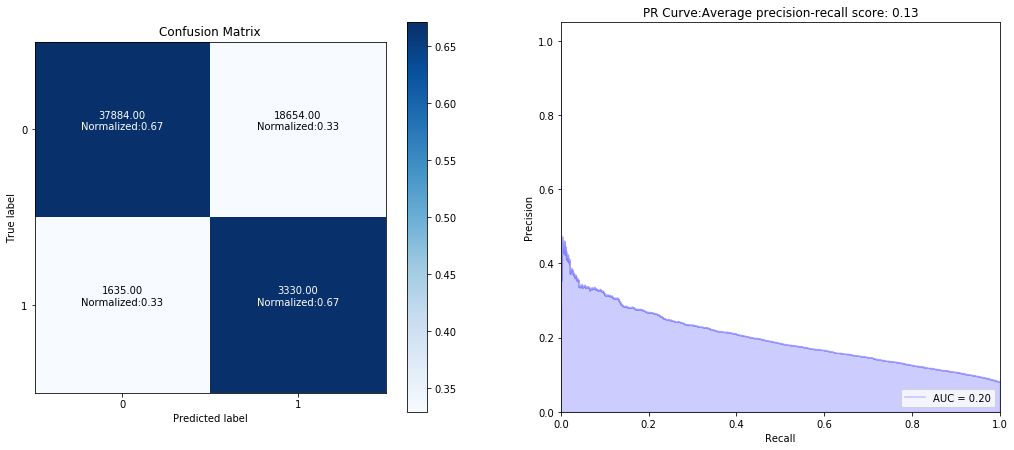

Cross Validation Execution :  2
Detailed classification report:

             precision    recall  f1-score   support

          0       0.96      0.67      0.79     56538
          1       0.15      0.67      0.25      4965

avg / total       0.89      0.67      0.74     61503

Accuracy: 0.6682926036128319
Weighted F1 score: 0.7436724340228531


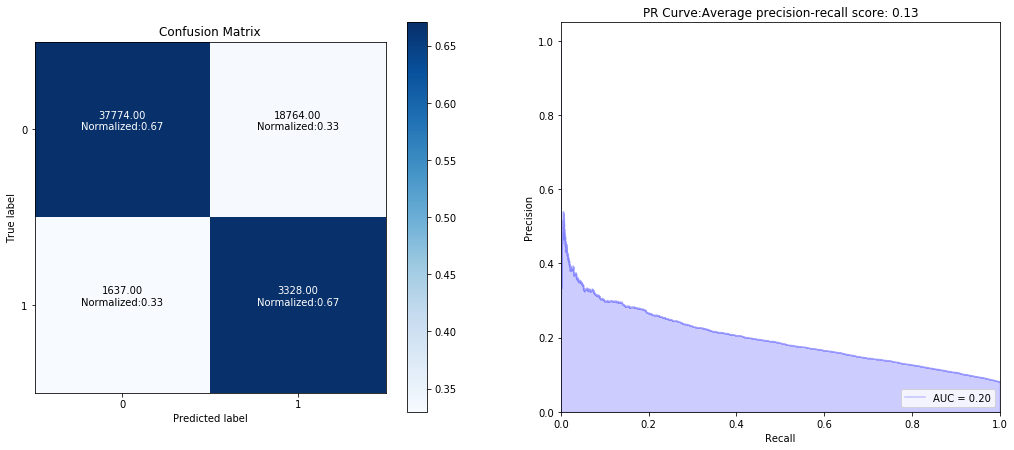

Cross Validation Execution :  3
Detailed classification report:

             precision    recall  f1-score   support

          0       0.96      0.67      0.79     56538
          1       0.15      0.66      0.24      4965

avg / total       0.89      0.67      0.74     61503

Accuracy: 0.6694470188446092
Weighted F1 score: 0.7445172050690632


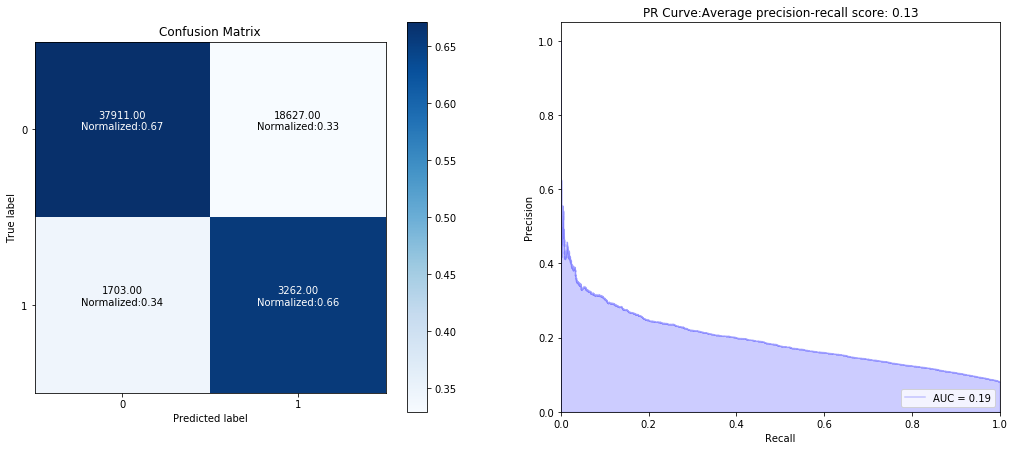

Execution time:  201.00366100000002  seconds


In [16]:
start_time = time.clock()

pca = PCA(n_components=110)
# Logestic regression with balanced class_weight as the dataset is highly imbalanced
cls = LogisticRegression(class_weight='balanced') 

pipe = Pipeline([('pca', pca), ('logistic', cls)])

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_std, Y):
    X_std_train = X_std[train_index]
    Y_train = Y[train_index]
    X_std_test = X_std[test_index]
    Y_test = Y[test_index]
    pipe.fit(X_std_train, Y_train.ravel())
    predictions = pipe.predict(X_std_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_std_test)
    print("Cross Validation Execution : ", count)
    count = count + 1
    classification_evaluation(Y_test, predictions, pred_prob)
print("Execution time: ", time.clock() - start_time, " seconds")

<b>3. MinMaxScaled Input dataset</b>


Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.63      0.76     56538
          1       0.13      0.64      0.22      4965

avg / total       0.89      0.63      0.72     61503

Accuracy: 0.6320667284522706
Weighted F1 score: 0.7157264786980264


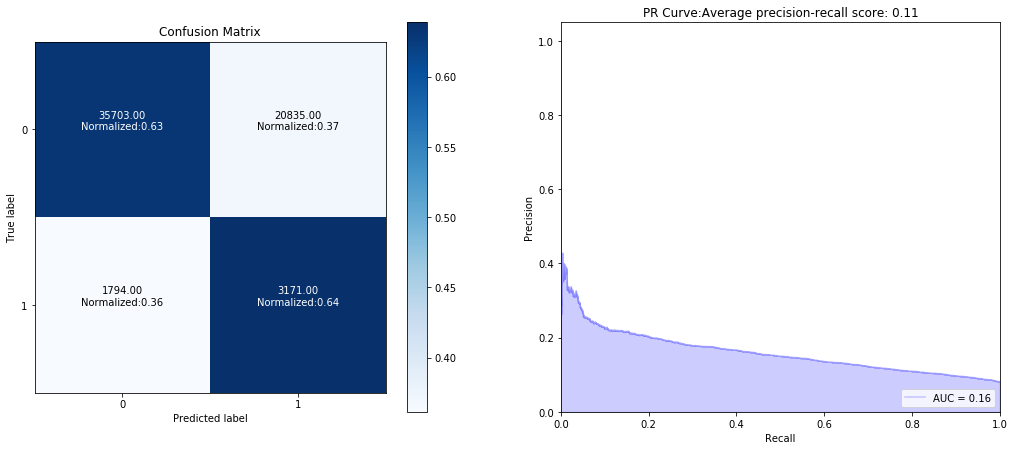

Cross Validation Execution :  2
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.63      0.76     56538
          1       0.13      0.64      0.22      4965

avg / total       0.89      0.63      0.72     61503

Accuracy: 0.6319691722355008
Weighted F1 score: 0.7156542407799406


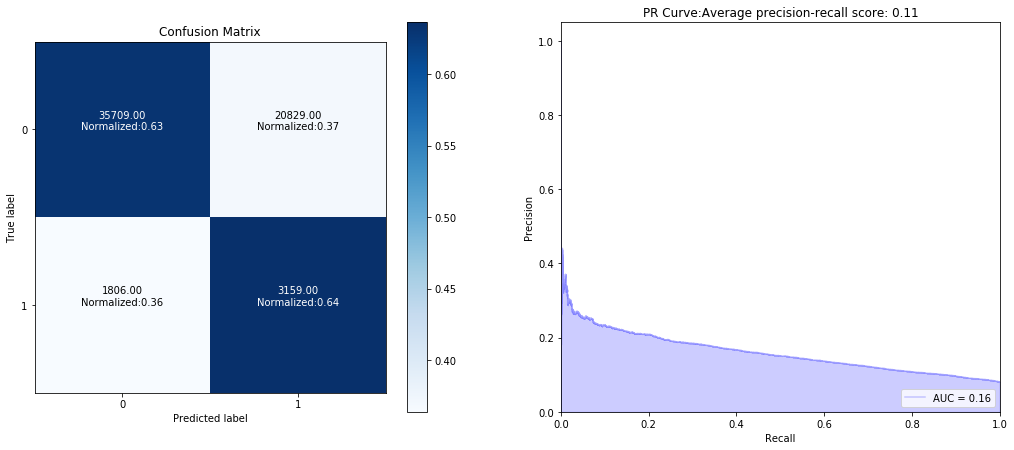

Cross Validation Execution :  3
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.63      0.76     56538
          1       0.13      0.63      0.22      4965

avg / total       0.89      0.63      0.72     61503

Accuracy: 0.6328146594475066
Weighted F1 score: 0.7163230669097728


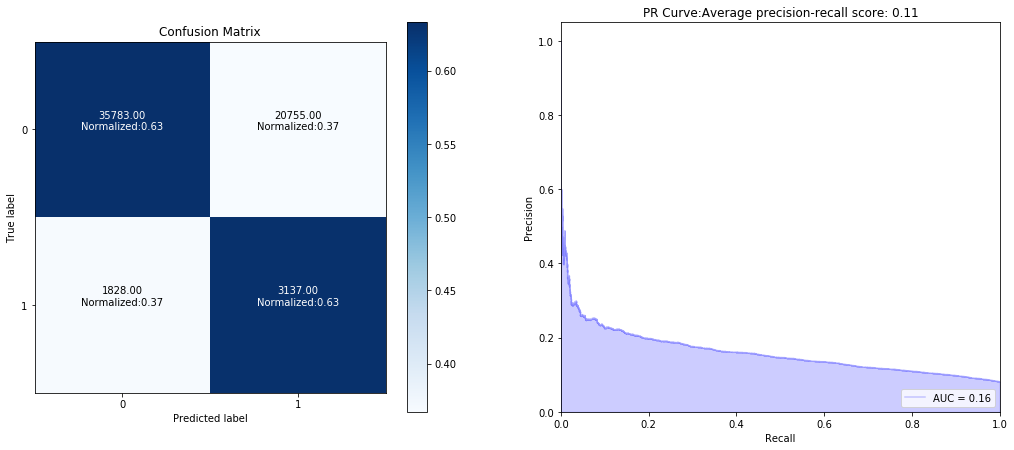

Execution time:  125.40662500000008  seconds


In [17]:
start_time = time.clock()

pca = PCA(n_components=35)
# Logestic regression with balanced class_weight as the dataset is highly imbalanced
cls = LogisticRegression(class_weight='balanced') 

pipe = Pipeline([('pca', pca), ('logistic', cls)])


sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_minMax, Y):
    X_minMax_train = X_minMax[train_index]
    Y_train = Y[train_index]
    X_minMax_test = X_minMax[test_index]
    Y_test = Y[test_index]
    pipe.fit(X_minMax_train, Y_train.ravel())
    predictions = pipe.predict(X_minMax_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_minMax_test)
    print("Cross Validation Execution : ", count)
    count = count + 1
    classification_evaluation(Y_test, predictions, pred_prob)
print("Execution time: ", time.clock() - start_time, " seconds")

<b>4. MaxAbsScaled Input dataset</b>


Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.62      0.75     56538
          1       0.13      0.63      0.21      4965

avg / total       0.88      0.62      0.71     61503

Accuracy: 0.6222460692974326
Weighted F1 score: 0.7080213665875486


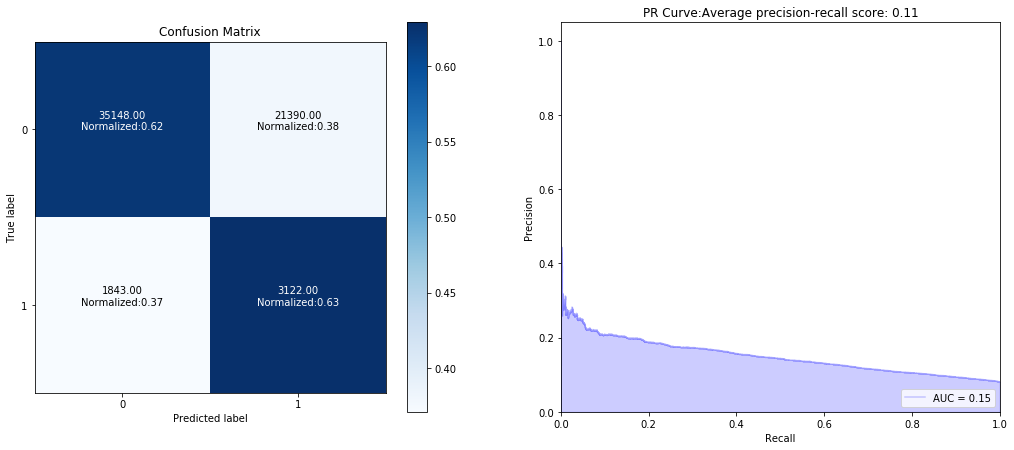

Cross Validation Execution :  2
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.62      0.75     56538
          1       0.13      0.62      0.21      4965

avg / total       0.88      0.62      0.71     61503

Accuracy: 0.6200673137895713
Weighted F1 score: 0.7063228549384402


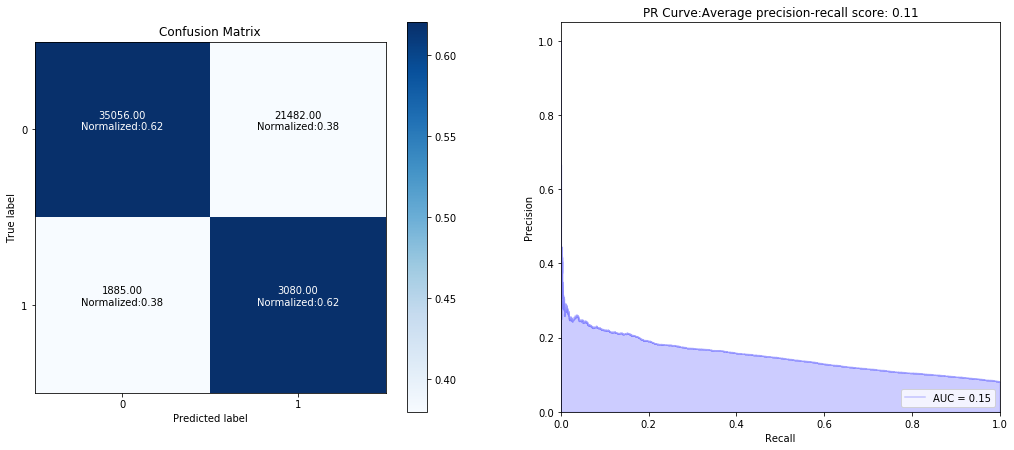

Cross Validation Execution :  3
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.62      0.75     56538
          1       0.12      0.61      0.21      4965

avg / total       0.88      0.62      0.70     61503

Accuracy: 0.6171243679170122
Weighted F1 score: 0.7040100162153649


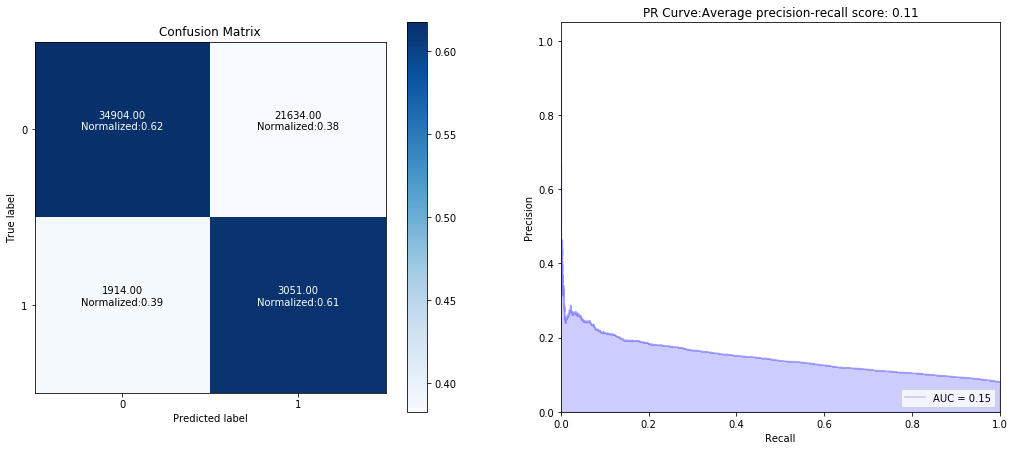

Execution time:  126.12221899999997  seconds


In [18]:
start_time = time.clock()

pca = PCA(n_components=35)
# Logestic regression with balanced class_weight as the dataset is highly imbalanced
cls = LogisticRegression(class_weight='balanced') 

pipe = Pipeline([('pca', pca), ('logistic', cls)])


sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_maxAbs, Y):
    X_maxAbs_train = X_maxAbs[train_index]
    Y_train = Y[train_index]
    X_maxAbs_test = X_maxAbs[test_index]
    Y_test = Y[test_index]
    pipe.fit(X_maxAbs_train, Y_train.ravel())
    predictions = pipe.predict(X_maxAbs_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_maxAbs_test)
    print("Cross Validation Execution : ", count)
    count = count + 1
    classification_evaluation(Y_test, predictions, pred_prob)
print("Execution time: ", time.clock() - start_time, " seconds")

### Result of Logestic Regression with PCA
The best performance of Logestic Regression came up with ScandardScaled Input dataset where we got te Average precision-Recall score of 0.13 with average accuracy of 0.67 and average f1-score of 0.745. This might be becasue the number of principle components for Scandard Scalar are the largest causing Logestic Regression with maximum number of parameters.

# Tunning of Logestic Regression
Since ScandardScaled Input dataset performed the best of the four datasets, taking this dataset as input dataset, perform tunning of logestic regression. Also perform tunning using the MaxMinScalar dataset as it has 35 principle components with average F1-score of 0.716.
<b>1. StandardScaled input data</b>

Best parameters set found on development set:

{'classify__C': 10}

Grid scores on development set:

0.666 (+/-0.003) for {'classify__C': 0.001}
0.669 (+/-0.001) for {'classify__C': 0.01}
0.669 (+/-0.003) for {'classify__C': 0.1}
0.669 (+/-0.002) for {'classify__C': 1}
0.671 (+/-0.003) for {'classify__C': 10}
0.670 (+/-0.004) for {'classify__C': 100}
0.669 (+/-0.001) for {'classify__C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

Detailed classification report:

             precision    recall  f1-score   support

          0       0.96      0.67      0.79     56648
          1       0.15      0.67      0.24      4855

avg / total       0.90      0.67      0.75     61503

Accuracy: 0.6716420337219323
Weighted F1 score: 0.747147490930949


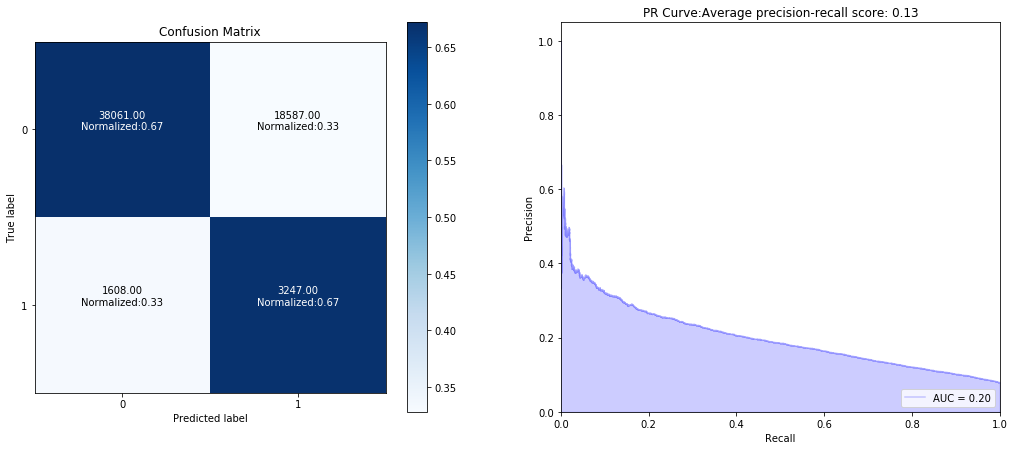

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model.sag import sag_solver
from sklearn.model_selection import train_test_split
# Split the dataset in Test and Train
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.2, random_state=0)
C_options = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
pipe = Pipeline([
    ('pca', PCA(n_components=110)),
    ('classify', LogisticRegression(penalty='l2', class_weight='balanced'))
])
param_grid = [
    {
        'classify__C': C_options
    }
]
clf = GridSearchCV(pipe, param_grid, cv=3, n_jobs=1)
clf.fit(X_train, y_train.ravel())

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print("\nDetailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n")
y_true, y_pred = y_test, clf.predict(X_test)
classification_evaluation(y_true, y_pred, clf.predict_proba(X_test))

The above output suggests the best value of C is 1000 but the improvement thats obtained by using C=1000 is 0.001 over the mean_test_score obtained when C=1 which does not show any significant improvement.
So the logestic regression with C=1 (default) is the model that will be used. 

<b>2. MinMaxScaled input data</b>

Best parameters set found on development set:

{'classify__C': 0.1, 'pca__n_components': 60}

Grid scores on development set:

0.587 (+/-0.001) for {'classify__C': 0.001, 'pca__n_components': 15}
0.629 (+/-0.002) for {'classify__C': 0.001, 'pca__n_components': 35}
0.659 (+/-0.003) for {'classify__C': 0.001, 'pca__n_components': 60}
0.588 (+/-0.001) for {'classify__C': 0.01, 'pca__n_components': 15}
0.632 (+/-0.002) for {'classify__C': 0.01, 'pca__n_components': 35}
0.664 (+/-0.002) for {'classify__C': 0.01, 'pca__n_components': 60}
0.588 (+/-0.001) for {'classify__C': 0.1, 'pca__n_components': 15}
0.632 (+/-0.002) for {'classify__C': 0.1, 'pca__n_components': 35}
0.665 (+/-0.003) for {'classify__C': 0.1, 'pca__n_components': 60}
0.588 (+/-0.001) for {'classify__C': 1, 'pca__n_components': 15}
0.632 (+/-0.001) for {'classify__C': 1, 'pca__n_components': 35}
0.665 (+/-0.003) for {'classify__C': 1, 'pca__n_components': 60}
0.588 (+/-0.001) for {'classify__C': 10, 'pca__n_components': 15}


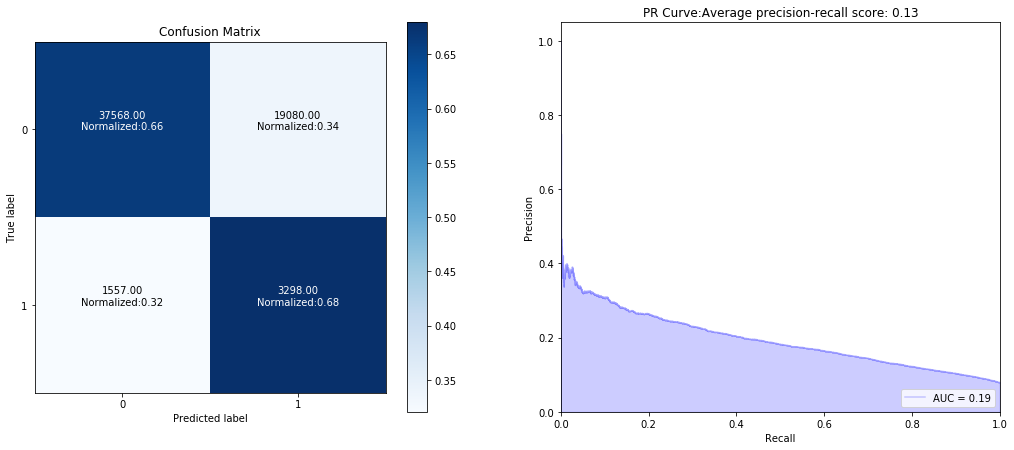

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model.sag import sag_solver
# Split the dataset in Test and Train
X_train, X_test, y_train, y_test = train_test_split(X_minMax, Y, test_size=0.2, random_state=0)
C_options = [0.001, 0.01, 0.1, 1, 10, 100]
pipe = Pipeline([
    ('pca', PCA()),
    ('classify', LogisticRegression(penalty='l2', class_weight='balanced'))
])
param_grid = [
    {
        'pca__n_components':[15, 35, 60], # 15 - 60% variance, 35 - 80% variance 60- 90% variance
        'classify__C': C_options
    }
]
clf = GridSearchCV(pipe, param_grid, cv=3, n_jobs=1)
clf.fit(X_train, y_train.ravel())

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
classification_evaluation(y_true, y_pred, clf.predict_proba(X_test))

The increase in the value of C does not cause any significant impact on the results.

But as we increase the number of principle component, the mean_test_score improves. This makes sense as the logestic regression would have large number of features to make the prediction but this may also lead to overfitting. But in all these cases the deviation in the test score everytime is very small suggesting that no overfitting. 

As we see from the output above, there is around 0.05 points (5%) improvement when the principle components are changed from 15 to 35 and then there is around 0.03 points (3%) improvement when the principle components are changed from 35 to 60. 

So the choice of 60 principle components looks to be a better option but that means large parameters which mean that PCA is not doing a good job in reducing the dimension of the input matrix.

# Unsupervised Neural network model
## BernoulliRBM feature extractor and a LogisticRegression classifier
Restricted Boltzmann machines (RBM) are unsupervised nonlinear feature learners based on a probabilistic model. BernoulliRBM assumes the inputs are either binary values or values between 0 and 1, each encoding the probability that the specific feature would be turned on. So here we will be using scaled dataset only. RBM tries to maximize the likelihood of the data using a particular graphical model. The parameter learning algorithm used (Stochastic Maximum Likelihood) prevents the representations from straying far from the input data, which makes them capture interesting regularities, but makes the model less useful for small datasets, and usually not useful for density estimation. Since we have a decent dataset, BernoulliRBM may be a tryworthy algorithm to implement. 

In [22]:
from sklearn.neural_network import BernoulliRBM
start_time = time.clock()
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.20, random_state=0)

# initialize the RBM + Logistic Regression pipeline
rbm = BernoulliRBM(random_state=1, verbose=True)
logistic = LogisticRegression(penalty='l2', class_weight='balanced')
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# perform a grid search on the learning rate, number of iterations, and number of components on the RBM 
print("SEARCHING RBM AND LOGISTIC REGRESSION'S HYPER-PARAMETERS")
params = {
    'rbm__learning_rate': [0.1, 0.01, 0.001],
    'rbm__n_iter': [10, 25, 40], # epochs
    'rbm__n_components': [100, 256, 500] #hidden layers
}

# perform a grid search over the parameter
clf = GridSearchCV(classifier, params, n_jobs=-1, verbose=1, cv=2)
clf.fit(X_train, Y_train.ravel())

# print diagnostic information to the user and grab the
# best model
print("best score: %0.3f" % (clf.best_score_))
print("RBM + LOGISTIC REGRESSION'S HYPER-PARAMETERS")

CV_result = clf.best_estimator_.get_params()

print("\nGrid scores on development set:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

SEARCHING RBM AND LOGISTIC REGRESSION'S HYPER-PARAMETERS
Fitting 2 folds for each of 27 candidates, totalling 54 fits
[BernoulliRBM] Iteration 1, pseudo-likelihood = -297160.88, time = 18.96s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -588546.60, time = 21.27s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -880012.59, time = 21.13s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1171707.01, time = 21.11s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1463141.80, time = 21.12s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1754407.00, time = 21.37s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2045887.01, time = 21.54s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2337493.86, time = 21.64s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2629146.02, time = 21.54s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2920796.21, time = 21.58s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -291713.59, time = 18.91s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -578321.96, 

[BernoulliRBM] Iteration 38, pseudo-likelihood = -11080123.71, time = 21.61s
[BernoulliRBM] Iteration 39, pseudo-likelihood = -11371499.95, time = 22.63s
[BernoulliRBM] Iteration 40, pseudo-likelihood = -11662962.53, time = 23.22s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -291713.59, time = 18.89s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -578321.96, time = 21.35s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -864827.58, time = 21.67s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1151255.50, time = 22.51s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1437659.26, time = 22.48s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1723930.90, time = 22.86s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2009904.58, time = 21.92s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2295976.07, time = 22.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2582262.20, time = 21.48s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2868165.45, time = 21.78s
[BernoulliRBM] Iterat

[BernoulliRBM] Iteration 22, pseudo-likelihood = -16115421.03, time = 68.76s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -16847467.27, time = 66.07s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -17579023.50, time = 66.24s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -18310159.45, time = 65.25s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -760355.99, time = 61.92s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1507504.75, time = 66.50s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2253939.12, time = 66.94s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -3000468.30, time = 66.59s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -3747216.18, time = 65.23s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -4493488.37, time = 66.74s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -5240693.94, time = 65.93s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -5986774.93, time = 67.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -6731197.97, time = 65.07s
[BernoulliRBM] Ite

[BernoulliRBM] Iteration 5, pseudo-likelihood = -7316150.97, time = 92.30s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -8773671.90, time = 94.22s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -10231052.48, time = 94.42s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -11688271.99, time = 96.41s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -13145191.20, time = 98.82s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -14602191.31, time = 98.01s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -16061205.05, time = 107.69s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -17516016.48, time = 109.08s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -18972909.78, time = 109.45s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -20432135.75, time = 115.97s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -21888393.34, time = 98.20s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -23343335.73, time = 99.27s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -24799749.32, time = 94.73s
[B

[BernoulliRBM] Iteration 23, pseudo-likelihood = -32897963.30, time = 84.74s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -34322642.76, time = 82.95s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -35750684.56, time = 83.64s
[BernoulliRBM] Iteration 26, pseudo-likelihood = -37179153.45, time = 86.14s
[BernoulliRBM] Iteration 27, pseudo-likelihood = -38607819.42, time = 88.52s
[BernoulliRBM] Iteration 28, pseudo-likelihood = -40036408.20, time = 86.28s
[BernoulliRBM] Iteration 29, pseudo-likelihood = -41465325.48, time = 86.45s
[BernoulliRBM] Iteration 30, pseudo-likelihood = -42893008.07, time = 84.71s
[BernoulliRBM] Iteration 31, pseudo-likelihood = -44322228.03, time = 85.06s
[BernoulliRBM] Iteration 32, pseudo-likelihood = -45751353.88, time = 86.15s
[BernoulliRBM] Iteration 33, pseudo-likelihood = -47178245.04, time = 92.32s
[BernoulliRBM] Iteration 34, pseudo-likelihood = -48609339.95, time = 94.66s
[BernoulliRBM] Iteration 35, pseudo-likelihood = -50034849.49, time = 94.68s

[BernoulliRBM] Iteration 23, pseudo-likelihood = -671065.20, time = 20.92s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -700217.94, time = 20.95s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -729370.12, time = 20.98s
[BernoulliRBM] Iteration 26, pseudo-likelihood = -758520.36, time = 21.11s
[BernoulliRBM] Iteration 27, pseudo-likelihood = -787671.87, time = 21.04s
[BernoulliRBM] Iteration 28, pseudo-likelihood = -816822.41, time = 21.17s
[BernoulliRBM] Iteration 29, pseudo-likelihood = -845975.09, time = 21.17s
[BernoulliRBM] Iteration 30, pseudo-likelihood = -875127.31, time = 21.67s
[BernoulliRBM] Iteration 31, pseudo-likelihood = -904279.95, time = 21.30s
[BernoulliRBM] Iteration 32, pseudo-likelihood = -933430.16, time = 21.55s
[BernoulliRBM] Iteration 33, pseudo-likelihood = -962582.67, time = 21.18s
[BernoulliRBM] Iteration 34, pseudo-likelihood = -991734.11, time = 21.13s
[BernoulliRBM] Iteration 35, pseudo-likelihood = -1020889.02, time = 21.10s
[BernoulliRBM] Iteration

[BernoulliRBM] Iteration 8, pseudo-likelihood = -587619.53, time = 61.57s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -660796.10, time = 57.77s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -734069.25, time = 57.39s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -807344.92, time = 57.52s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -880474.94, time = 57.22s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -953681.84, time = 57.23s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1026911.57, time = 57.65s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -1100142.39, time = 57.24s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -1173373.57, time = 57.49s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -1246604.84, time = 57.41s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -1319833.09, time = 57.39s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -1393055.38, time = 57.62s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -1466278.43, time = 58.14s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 2, pseudo-likelihood = -289223.90, time = 99.66s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -432392.79, time = 93.32s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -575364.38, time = 88.31s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -718302.31, time = 89.97s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -861354.38, time = 90.50s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1004494.76, time = 90.57s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1147533.81, time = 90.29s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1290433.06, time = 89.27s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1433684.07, time = 91.56s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -148563.31, time = 80.49s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -293928.28, time = 95.63s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -439433.08, time = 89.73s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -584747.88, time = 98.58s
[BernoulliRBM] Iteration 5, pseud

[BernoulliRBM] Iteration 11, pseudo-likelihood = -1576542.60, time = 84.27s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1720014.82, time = 83.72s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1862567.21, time = 83.76s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -2005521.86, time = 84.32s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -2148544.98, time = 84.29s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -2291583.06, time = 84.46s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -2434704.84, time = 84.40s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -2577783.98, time = 84.06s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -2720584.54, time = 84.10s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -2863491.66, time = 83.43s
[BernoulliRBM] Iteration 21, pseudo-likelihood = -3006596.00, time = 83.99s
[BernoulliRBM] Iteration 22, pseudo-likelihood = -3149453.52, time = 83.59s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -3292439.16, time = 84.48s
[BernoulliRB

[BernoulliRBM] Iteration 12, pseudo-likelihood = -35832.05, time = 21.66s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -38749.07, time = 21.57s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -41657.96, time = 21.42s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -44573.99, time = 21.44s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -47488.30, time = 21.74s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -50404.12, time = 21.45s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -53315.61, time = 21.26s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -56230.04, time = 21.44s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -59150.32, time = 21.64s
[BernoulliRBM] Iteration 21, pseudo-likelihood = -62062.96, time = 22.91s
[BernoulliRBM] Iteration 22, pseudo-likelihood = -64969.71, time = 23.00s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -67884.83, time = 21.76s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -70795.37, time = 21.80s
[BernoulliRBM] Iteration 25, pseudo-li

[BernoulliRBM] Iteration 23, pseudo-likelihood = -172455.36, time = 59.24s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -179898.57, time = 106.38s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -187346.97, time = 134.26s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -15043.26, time = 121.32s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -16730.31, time = 96.97s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -23562.58, time = 129.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -30887.30, time = 125.45s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -38111.53, time = 89.63s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -45221.48, time = 57.64s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -52433.74, time = 58.36s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -59731.13, time = 57.89s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -67042.91, time = 57.61s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -74371.23, time = 57.82s
[BernoulliRBM] Iteration 11, pseudo-lik

[BernoulliRBM] Iteration 4, pseudo-likelihood = -60062.07, time = 88.30s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -74362.42, time = 87.32s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -88771.15, time = 86.55s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -103310.01, time = 88.40s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -117849.07, time = 86.71s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -132392.29, time = 87.07s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -146928.77, time = 86.40s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -25085.63, time = 75.95s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -32401.61, time = 90.31s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -45445.25, time = 88.42s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -59502.01, time = 88.84s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -73476.73, time = 87.81s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -87455.50, time = 88.65s
[BernoulliRBM] Iteration 7, pseudo-likelihood 

[BernoulliRBM] Iteration 5, pseudo-likelihood = -73476.73, time = 84.97s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -87455.50, time = 86.15s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -101683.54, time = 84.78s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -115962.48, time = 85.25s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -130240.33, time = 85.77s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -144526.10, time = 86.57s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -158812.24, time = 85.54s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -173109.22, time = 85.55s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -187407.87, time = 84.93s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -201708.62, time = 84.88s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -215985.36, time = 85.34s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -230273.97, time = 85.64s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -244569.71, time = 86.07s
[BernoulliRBM] Iteration 18, pse

[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 1330.4min finished


[BernoulliRBM] Iteration 1, pseudo-likelihood = -33758.98, time = 170.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -60583.16, time = 191.82s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -88972.57, time = 196.10s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -118013.97, time = 199.17s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -147116.75, time = 200.40s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -176216.60, time = 225.53s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -205343.59, time = 223.74s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -234473.20, time = 203.95s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -263616.08, time = 175.31s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -292765.38, time = 169.56s
best score: 0.656
RBM + LOGISTIC REGRESSION'S HYPER-PARAMETERS

Grid scores on development set:

0.653 (+/-0.003) for {'rbm__learning_rate': 0.1, 'rbm__n_components': 100, 'rbm__n_iter': 10}
0.653 (+/-0.003) for {'rbm__learning_rate': 0.1, 'rbm__n_comp

NameError: name 'y_test' is not defined

Due to time constraint, the above error was corrected in a new code block as it takes time for this algorithm to finish training.


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      0.69      0.79     56648
          1       0.08      0.34      0.13      4855

avg / total       0.86      0.66      0.74     61503

Accuracy: 0.6580492008519909
Weighted F1 score: 0.735441506008321


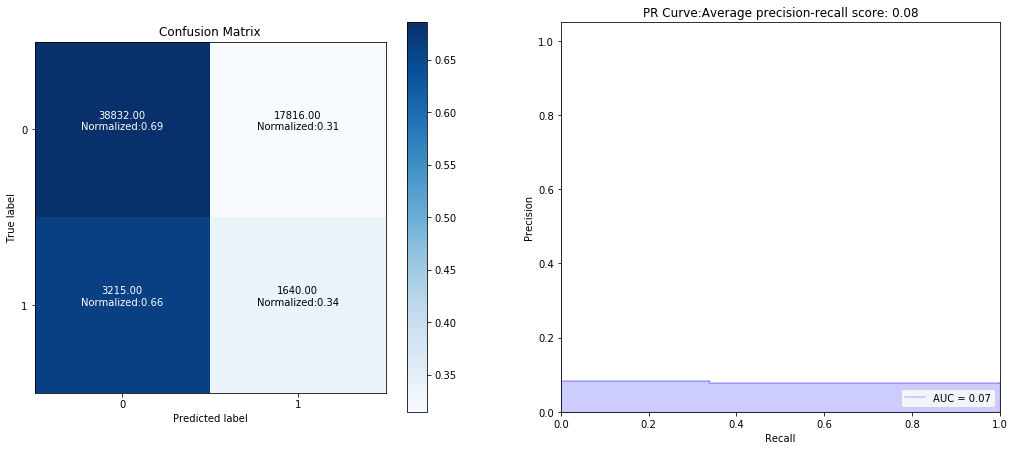

In [23]:
print("\nDetailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
y_true, y_pred = Y_test, clf.predict(X_test)
classification_evaluation(y_true, y_pred, clf.predict_proba(X_test))

best score: 0.656
RBM + LOGISTIC REGRESSION'S HYPER-PARAMETERS

Grid scores on development set:

0.653 (+/-0.003) for {'rbm__learning_rate': 0.1, 'rbm__n_components': 100, 'rbm__n_iter': 10}
0.653 (+/-0.003) for {'rbm__learning_rate': 0.1, 'rbm__n_components': 100, 'rbm__n_iter': 25}
0.653 (+/-0.002) for {'rbm__learning_rate': 0.1, 'rbm__n_components': 100, 'rbm__n_iter': 40}
0.653 (+/-0.002) for {'rbm__learning_rate': 0.1, 'rbm__n_components': 256, 'rbm__n_iter': 10}
0.653 (+/-0.002) for {'rbm__learning_rate': 0.1, 'rbm__n_components': 256, 'rbm__n_iter': 25}
0.653 (+/-0.002) for {'rbm__learning_rate': 0.1, 'rbm__n_components': 256, 'rbm__n_iter': 40}
0.653 (+/-0.002) for {'rbm__learning_rate': 0.1, 'rbm__n_components': 500, 'rbm__n_iter': 10}
0.653 (+/-0.002) for {'rbm__learning_rate': 0.1, 'rbm__n_components': 500, 'rbm__n_iter': 25}
0.653 (+/-0.002) for {'rbm__learning_rate': 0.1, 'rbm__n_components': 500, 'rbm__n_iter': 40}
0.654 (+/-0.002) for {'rbm__learning_rate': 0.01, 'rbm__n

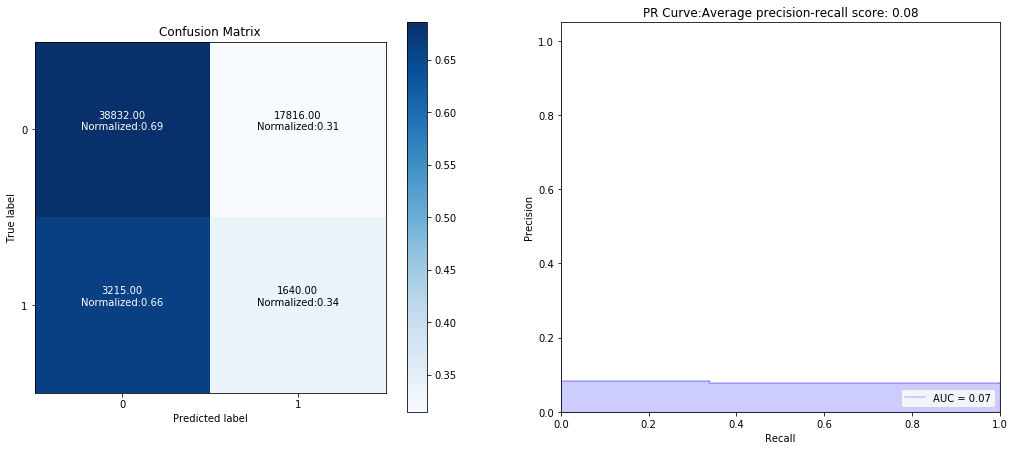

In [25]:
# print diagnostic information to the user and grab the
# best model
print("best score: %0.3f" % (clf.best_score_))
print("RBM + LOGISTIC REGRESSION'S HYPER-PARAMETERS")

CV_result = clf.best_estimator_.get_params()

print("\nGrid scores on development set:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("\nDetailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
y_true, y_pred = Y_test, clf.predict(X_test)
classification_evaluation(y_true, y_pred, clf.predict_proba(X_test))
print("Best model:")

In [114]:
# Best model for rbm
CV_result['rbm']

BernoulliRBM(batch_size=10, learning_rate=0.001, n_components=500, n_iter=10,
       random_state=1, verbose=True)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -620483.99, time = 39.82s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1232712.91, time = 47.32s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1844360.52, time = 45.42s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2455810.01, time = 46.20s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -3067907.28, time = 44.95s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -3678247.69, time = 46.05s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -4289207.25, time = 45.58s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -4900112.89, time = 45.39s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -5511084.28, time = 45.98s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -6121752.77, time = 45.24s
Standardized Data - RBM + Logestic Regression Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      0.68      0.78     56538
          1       0.09      0.3

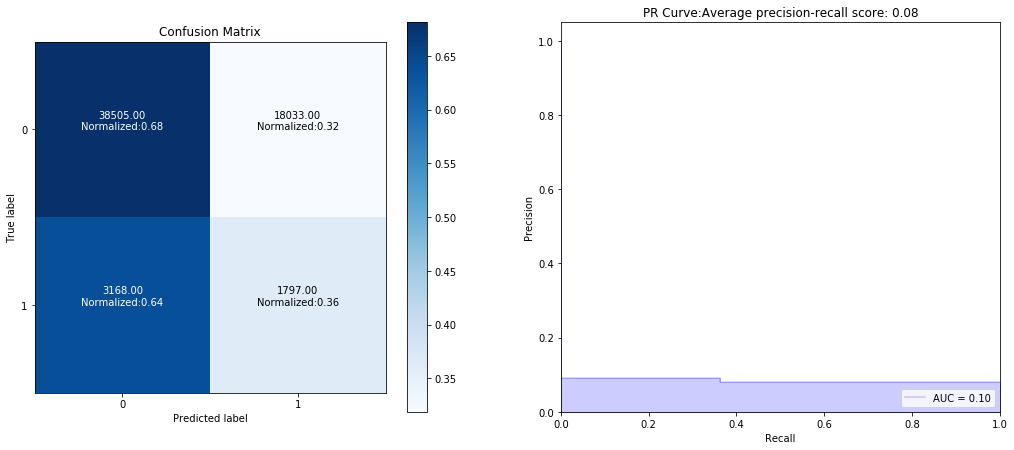

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Standardized Data - RBM + QCA Cross Validation Execution :  2
Detailed classification report:

             precision    recall  f1-score   support

          0       0.90      0.00      0.00     56538
          1       0.08      1.00      0.15      4965

avg / total       0.84      0.08      0.01     61503

Accuracy: 0.08126432856933809
Weighted F1 score: 0.013260384097147243


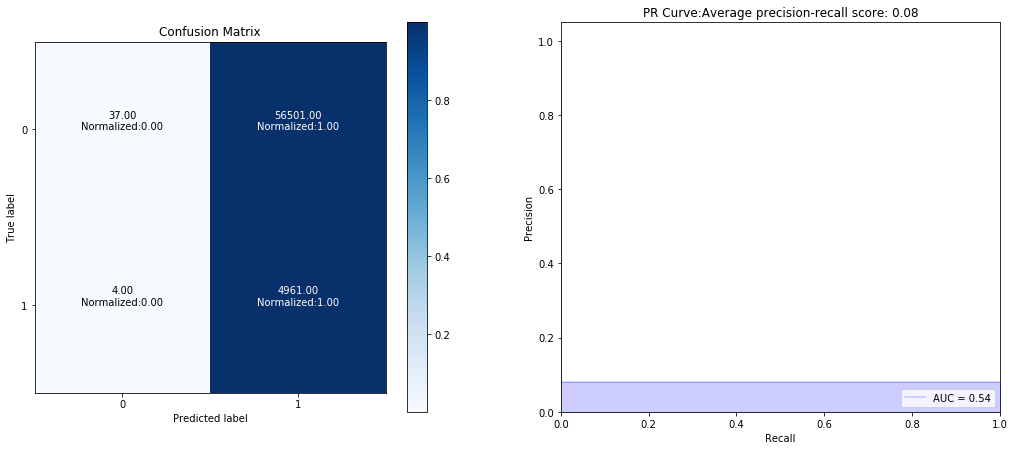

In [19]:
# Pick the best rbm model and apply a few different classification algorithms on the features learned by RBM
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit


rbm_best = BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=10, random_state=0, verbose=True)
logistic = LogisticRegression(penalty='l2', class_weight='balanced')
qca = QuadraticDiscriminantAnalysis(priors=[ 0.9, 0.1])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_std, Y):
    X_train = X_std[train_index]
    Y_train = Y[train_index]
    X_test = X_std[test_index]
    Y_test = Y[test_index]
    logistic.fit(rbm_best.fit_transform(X_train), Y_train.ravel())
    y_pred = logistic.predict(rbm_best.transform(X_test))
    pred_prob = logistic.predict_proba(rbm_best.transform(X_test))
    print("Standardized Data - RBM + Logestic Regression Cross Validation Execution : ", count)
    count = count + 1
    classification_evaluation(Y_test, y_pred, pred_prob)
    X_train = X_std[train_index]
    Y_train = Y[train_index]
    X_test = X_std[test_index]
    Y_test = Y[test_index]
    qca.fit(rbm_best.transform(X_train), Y_train.ravel())
    y_pred = qca.predict(rbm_best.transform(X_test))
    pred_prob = qca.predict_proba(rbm_best.transform(X_test))
    print("Standardized Data - RBM + QCA Cross Validation Execution : ", count)
    count = count + 1
    classification_evaluation(Y_test, y_pred, pred_prob)

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Standardized Data - QCA Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.01      0.01     56538
          1       0.08      0.99      0.15      4965

avg / total       0.86      0.09      0.02     61503

Accuracy: 0.08627221436352699
Weighted F1 score: 0.023950333456426044


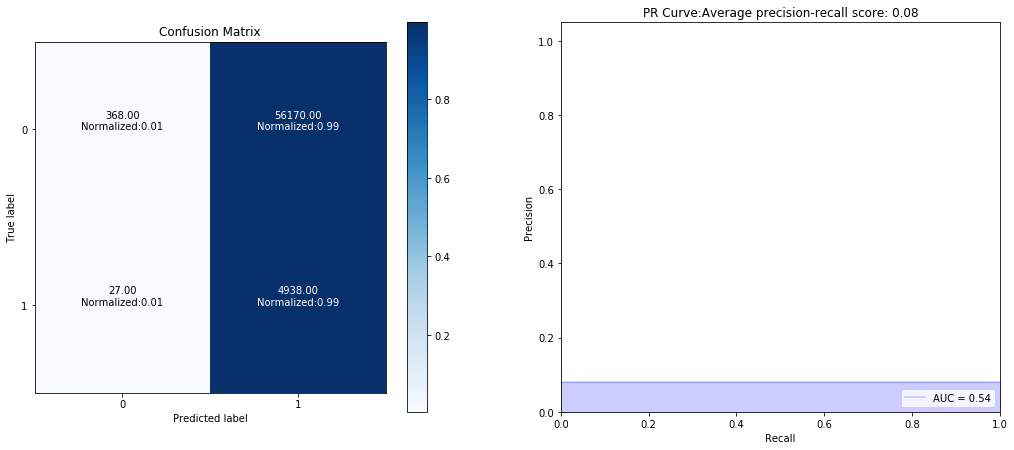

In [22]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_std, Y):
    X_train = X_std[train_index]
    Y_train = Y[train_index]
    X_test = X_std[test_index]
    Y_test = Y[test_index]
    qca.fit(X_train, Y_train.ravel())
    y_pred = qca.predict(X_test)
    pred_prob = qca.predict_proba(X_test)
    print("Standardized Data - QCA Execution : ")
    count = count + 1
    classification_evaluation(Y_test, y_pred, pred_prob)

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE( ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train.ravel())

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
print(np.shape(y_train_res), np.shape(Y_train))

(452296,) (246008, 1)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -1473063.58, time = 72.43s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2957258.91, time = 84.75s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -4458847.85, time = 84.22s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -5962821.78, time = 84.81s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -7471277.19, time = 84.43s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -8981656.11, time = 84.94s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -10493588.05, time = 85.76s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -12009127.44, time = 84.81s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -13520347.04, time = 84.70s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -15035006.61, time = 91.13s


/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Standard Scaled Over sampled Data - RBM + Logestic Regression Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.91      0.32      0.48     56538
          1       0.08      0.64      0.14      4965

avg / total       0.84      0.35      0.45     61503

Accuracy: 0.34941384973090744
Weighted F1 score: 0.45036651962049


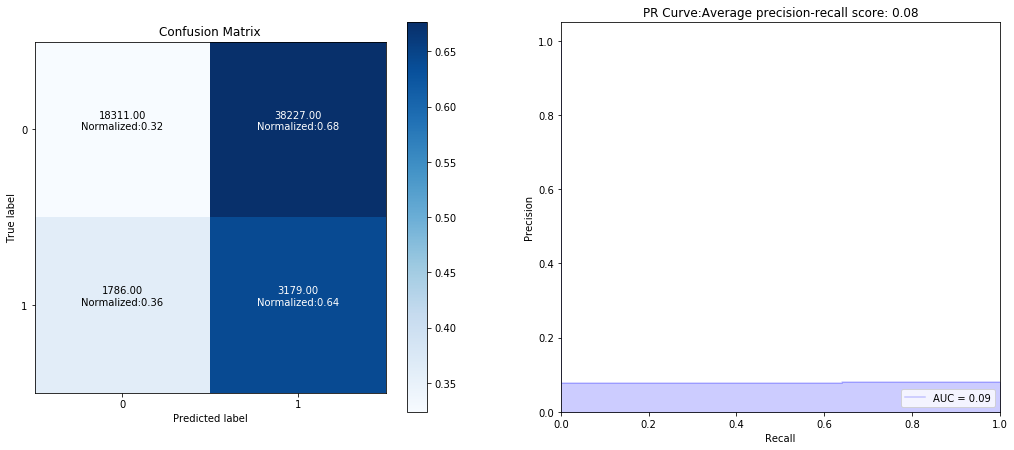

In [24]:
# Pick the best rbm model and apply classification algorithms on oversampled train data
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
rbm_best = BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=10, random_state=0, verbose=True)
logistic = LogisticRegression(penalty='l2')
qca = QuadraticDiscriminantAnalysis()
qca.fit(rbm_best.fit_transform(x_train_res), y_train_res.ravel())
y_pred = qca.predict(rbm_best.transform(X_test))
pred_prob = qca.predict_proba(rbm_best.transform(X_test))
print("Standard Scaled Over sampled Data - RBM + QCA Execution : ")
classification_evaluation(Y_test, y_pred, pred_prob)

Standard Scaled Over sampled Data - RBM + Logistic Regression Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.91      0.32      0.48     56538
          1       0.08      0.64      0.14      4965

avg / total       0.84      0.35      0.45     61503

Accuracy: 0.3494626278392924
Weighted F1 score: 0.45042200937416305


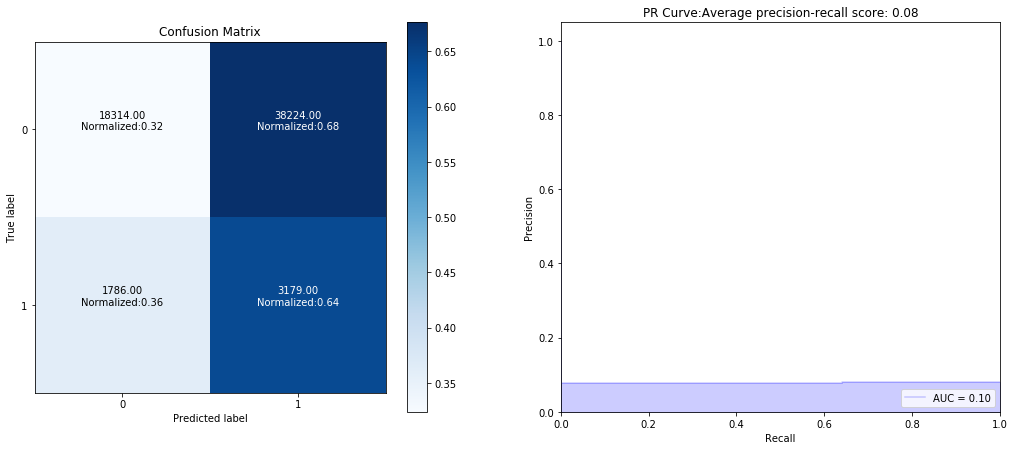

In [25]:
logistic = LogisticRegression(penalty='l2')
logistic.fit(rbm_best.transform(x_train_res), y_train_res.ravel())
y_pred = logistic.predict(rbm_best.transform(X_test))
pred_prob = logistic.predict_proba(rbm_best.transform(X_test))
print("Standard Scaled Over sampled Data - RBM + Logistic Regression Execution : ")
classification_evaluation(Y_test, y_pred, pred_prob)

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Standard Scaled Over sampled Data - RBM + Random Forest Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.91      0.32      0.48     56538
          1       0.08      0.64      0.14      4965

avg / total       0.84      0.35      0.45     61503

Accuracy: 0.3494951465782157
Weighted F1 score: 0.4504590002124732


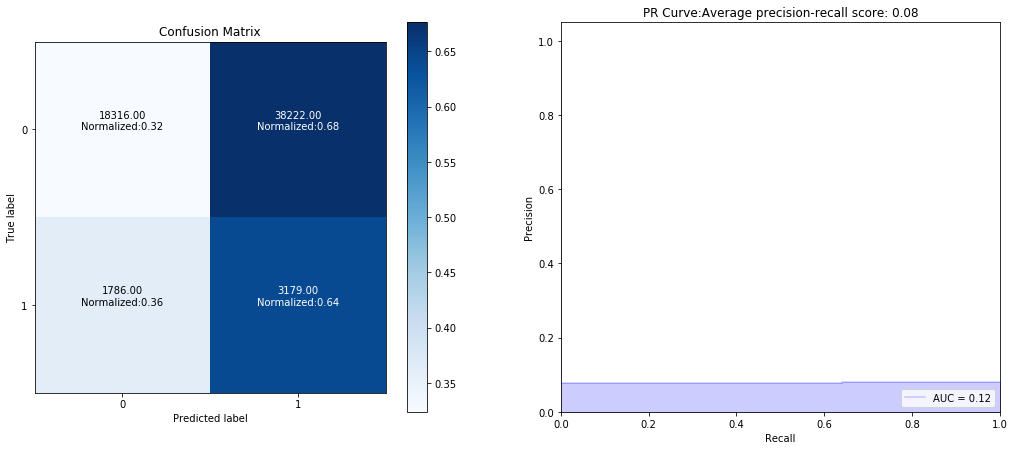

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(rbm_best.transform(x_train_res), y_train_res.ravel())
y_pred = rfc.predict(rbm_best.transform(X_test))
pred_prob = rfc.predict_proba(rbm_best.transform(X_test))
print("Standard Scaled Over sampled Data - RBM + Random Forest Execution : ")
classification_evaluation(Y_test, y_pred, pred_prob)

Standard Scaled Over sampled Data - Random Forest Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      0.99      0.95     56538
          1       0.24      0.04      0.06      4965

avg / total       0.87      0.91      0.88     61503

Accuracy: 0.9128335203160821
Weighted F1 score: 0.8822814452271777


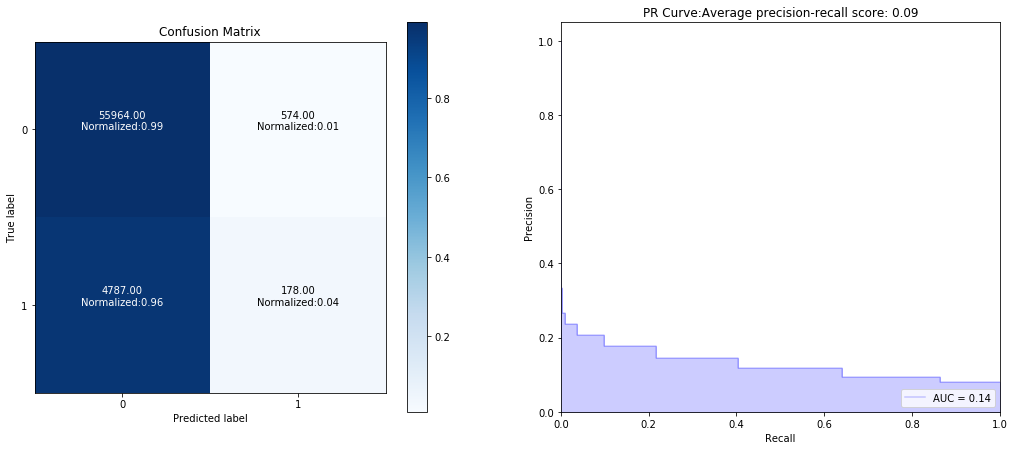

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_res, y_train_res.ravel())
y_pred = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)
print("Standard Scaled Over sampled Data - Random Forest Execution : ")
classification_evaluation(Y_test, y_pred, pred_prob)

Standard Scaled Over sampled Data - RBM + AdaBoost classifier Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.91      0.32      0.48     56538
          1       0.08      0.64      0.14      4965

avg / total       0.84      0.35      0.45     61503

Accuracy: 0.3494626278392924
Weighted F1 score: 0.45042200937416305


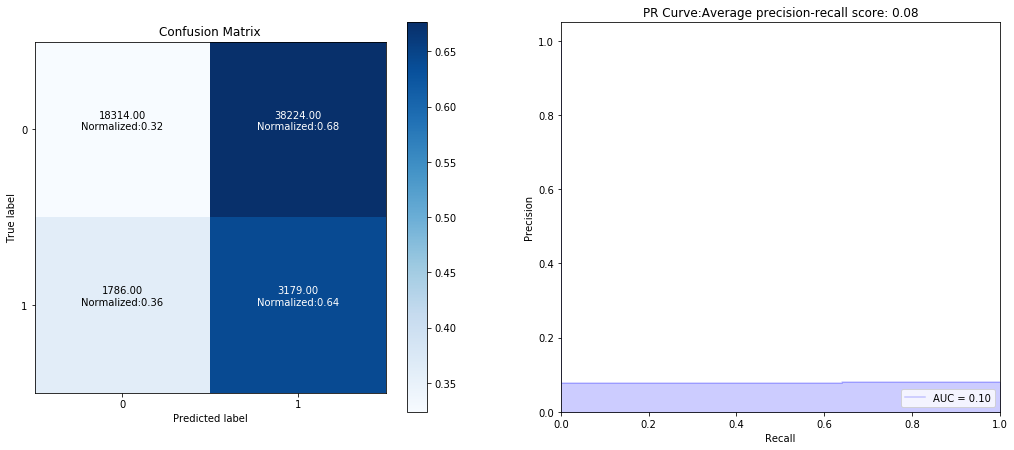

In [28]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(rbm_best.transform(x_train_res), y_train_res.ravel())
y_pred = abc.predict(rbm_best.transform(X_test))
pred_prob = abc.predict_proba(rbm_best.transform(X_test))
print("Standard Scaled Over sampled Data - RBM + AdaBoost classifier Execution : ")
classification_evaluation(Y_test, y_pred, pred_prob)

Standard Scaled Over sampled Data - AdaBoost classifier Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.96      0.94     56538
          1       0.22      0.11      0.15      4965

avg / total       0.87      0.90      0.88     61503

Accuracy: 0.8953872168837292
Weighted F1 score: 0.8799247660275419


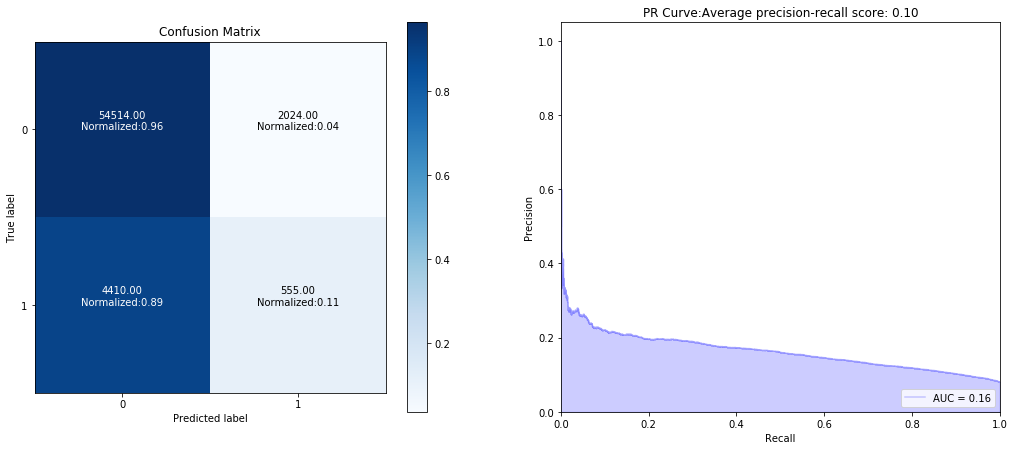

In [29]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train_res, y_train_res.ravel())
y_pred = abc.predict(X_test)
pred_prob = abc.predict_proba(X_test)
print("Standard Scaled Over sampled Data - AdaBoost classifier Execution : ")
classification_evaluation(Y_test, y_pred, pred_prob)

***
Fill the missing values with -1 instead of zero
***

In [80]:
df_kaggle = pd.read_csv('Cleaned_Application_Data.csv')
cols_df_kaggle = df_kaggle.columns
cols_df_kaggle = cols_df_kaggle.drop('SK_ID_CURR')
cols_feature_matrix = feature_matrix.columns
cols_common = list(set(cols_df_kaggle).intersection(cols_feature_matrix))
# Remove the columns from feature_matrix dataset that are present in both the datasets 
feature_matrix.drop(cols_common, axis=1, inplace=True)
# Merge the two dataset into a single dataset
df_kaggle = df_kaggle.merge(feature_matrix, on='SK_ID_CURR')
print(df_kaggle.shape)
desc = df_kaggle.describe(include='all').T
desc['percent_missing'] = (df_kaggle['TARGET'].size - desc['count'])*100/df_kaggle['TARGET'].size
desc = desc[desc['count']<df_kaggle['TARGET'].size][['count','percent_missing']]
print("The combined dataset has {} columns with missing data out of total {} columns".format(desc.shape[0], 
      df_kaggle.columns.size))
# fill all the missing information in this dataset with -1.
df_kaggle.fillna(-1, inplace=True)

(356255, 584)
The combined dataset has 451 columns with missing data out of total 584 columns


In [54]:
# Perform one-hot encoding
df_kaggle_onehot = pd.get_dummies(df_kaggle)
print('Kaggle dataset shape before and after onehot', df_kaggle.shape, df_kaggle_onehot.shape)

Kaggle dataset shape before and after onehot (356255, 584) (356255, 716)


In [55]:
# Separate the Kaggle train and kaggle test datasets from df_kaggle dataset
df_kaggle_train_new = df_kaggle_onehot[df_kaggle_onehot.TARGET !=- 1]
df_kaggle_test_new = df_kaggle_onehot[df_kaggle_onehot.TARGET == -1]
print(df_kaggle_train_new.shape, df_kaggle_test_new.shape)

(307511, 716) (48744, 716)


In [56]:
# Separate dependent and response variables
Y_new = df_kaggle_train_new.TARGET.values
Y_new = Y_new.reshape((Y_new.size, 1))
X_new = df_kaggle_train_new.drop(['TARGET', 'SK_ID_CURR'], axis=1).values
X_std_new = StandardScaler().fit_transform(X_new)

In [57]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_std, Y):
    X_train_new = X_std_new[train_index]
    Y_train_new = Y_new[train_index]
    X_test_new = X_std_new[test_index]
    Y_test_new = Y_new[test_index]

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE( ratio = 1.0)
x_train_res_new, y_train_res_new = sm.fit_sample(X_train_new, Y_train_new.ravel())

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -77144.76, time = 286.76s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -153294.18, time = 330.17s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -229917.57, time = 421.08s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -306947.96, time = 328.37s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -384105.67, time = 319.62s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -461326.17, time = 319.80s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -538567.75, time = 322.57s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -615824.12, time = 318.54s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -693110.56, time = 320.20s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -770387.40, time = 334.14s


/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Standard Scaled Over sampled Data - RBM + QCA Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      0.00      0.01     56538
          1       0.08      1.00      0.15      4965

avg / total       0.85      0.08      0.02     61503

Accuracy: 0.08323171227419801
Weighted F1 score: 0.01753512208665166


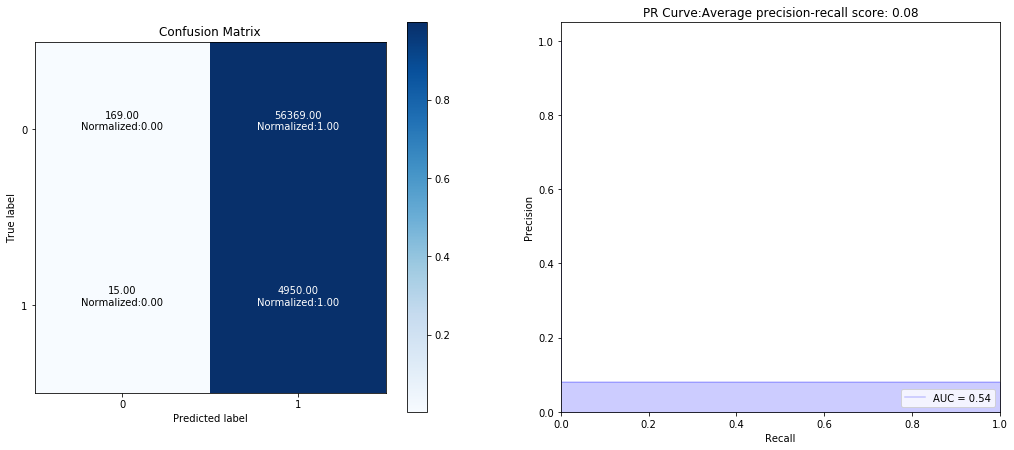

In [65]:
# Pick the best rbm model and apply classification algorithms on oversampled train data
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
rbm_best = BernoulliRBM(batch_size=10, learning_rate=0.001, n_components=500, n_iter=10, random_state=1, 
                verbose=True)
qca = QuadraticDiscriminantAnalysis()
qca.fit(rbm_best.fit_transform(x_train_res_new), y_train_res_new.ravel())
y_pred = qca.predict(rbm_best.transform(x_test_new))
pred_prob = qca.predict_proba(rbm_best.transform(x_test_new))
print("Standard Scaled Over sampled Data - RBM + QCA Execution : ")
classification_evaluation(Y_test, y_pred, pred_prob)

***
Jusst using the application dataset
***

In [129]:
print('Clearing up memory')

gc.enable()
# Clear up memory
del X_std_new, X_train_new, Y_train_new, X_test_new, Y_test_new, x_train_res_new, y_train_res_new
del df_kaggle, desc, feature_matrix, df_kaggle_onehot, df_kaggle_train, df_kaggle_test, X_maxAbs, X_minMax, X, Y
del X_train, Y_train, X_test, Y_test, x_train_res, y_train_res, x_train_res_new, y_train_res_new, X_train_new
del Y_train_new, Y_new, X_new, X_std_new, Y_train_new, X_train_new, Y_test_new, X_test_new, x_train_res_new
del y_train_res_new
gc.collect() # Request garbage collector to execute

Clearing up memory


41333

In [82]:
df_kaggle = pd.read_csv('Cleaned_Application_Data.csv')
# Perform one-hot encoding
df_kaggle = pd.get_dummies(df_kaggle)
# Separate the Kaggle train and kaggle test datasets from df_kaggle dataset
df_kaggle_train_app = df_kaggle_onehot[df_kaggle_onehot.TARGET !=- 1]
df_kaggle_test_app = df_kaggle_onehot[df_kaggle_onehot.TARGET == -1]

Y_app = df_kaggle_train_app.TARGET.values
Y_app = Y_app.reshape((Y_app.size, 1))
X_app = df_kaggle_train_app.drop(['TARGET', 'SK_ID_CURR'], axis=1).values
X_app_std = StandardScaler().fit_transform(X_app)

In [85]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_app, Y_app):
    X_train_app = X_app[train_index]
    Y_train_app = Y_app[train_index]
    X_test_app = X_app[test_index]
    Y_test_app = Y_app[test_index]
    X_train_app_std = X_app_std[train_index]
    X_test_app_std = X_app_std[test_index]
sm = SMOTE( ratio = 1.0)
x_train_res_app, y_train_res_app = sm.fit_sample(X_train_app, Y_train_app.ravel())
x_train_res_app_std, y_train_res_app_std = sm.fit_sample(X_train_app_std, Y_train_app.ravel())

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -69726.24, time = 114.76s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -139414.04, time = 150.83s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -209102.69, time = 144.65s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -278787.40, time = 144.11s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -348475.52, time = 144.65s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -418155.44, time = 144.47s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -487835.48, time = 144.29s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -557513.48, time = 148.32s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -627196.16, time = 144.98s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -696875.02, time = 143.41s


/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


UnScaled Over sampled Application Data - RBM + QCA Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     56538
          1       0.00      0.00      0.00      4965

avg / total       0.85      0.92      0.88     61503

Accuracy: 0.9192722306228964
Weighted F1 score: 0.8806061177888584


/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

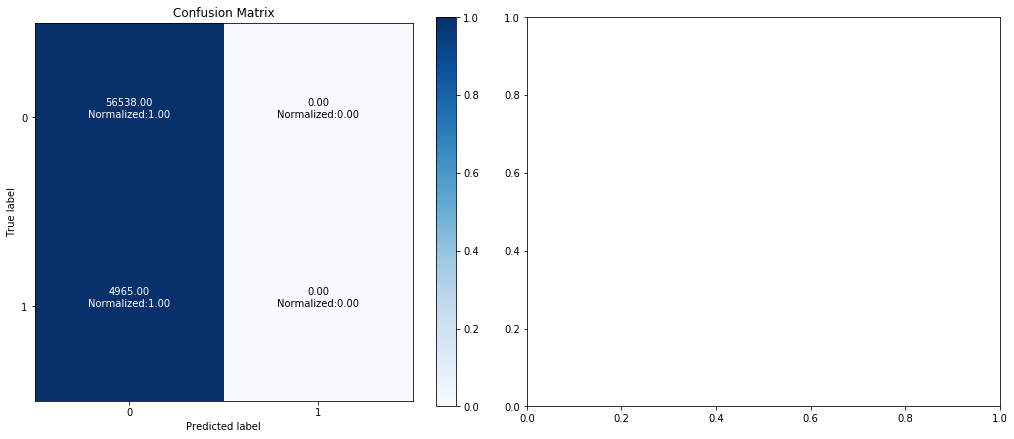

In [86]:
# Pick the best rbm model and apply classification algorithms on oversampled train data
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
rbm_best = BernoulliRBM(batch_size=10, learning_rate=0.001, n_components=500, n_iter=10, random_state=1, 
                verbose=True)
qca = QuadraticDiscriminantAnalysis()
qca.fit(rbm_best.fit_transform(x_train_res_app), y_train_res_app.ravel())
y_pred = qca.predict(rbm_best.transform(X_test_app))
pred_prob = qca.predict_proba(rbm_best.transform(X_test_app))
print("UnScaled Over sampled Application Data - RBM + QCA Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -14219.16, time = 115.18s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -27900.46, time = 147.96s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -41600.77, time = 147.13s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -55306.49, time = 142.48s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -69015.16, time = 141.93s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -82726.18, time = 141.47s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -96436.99, time = 141.70s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -110149.27, time = 141.34s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -123859.31, time = 140.59s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -137575.52, time = 141.42s


/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


StandardScaled Over sampled Application Data - RBM + QCA Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      0.00      0.00     56538
          1       0.08      1.00      0.15      4965

avg / total       0.85      0.08      0.02     61503

Accuracy: 0.08279270929873339
Weighted F1 score: 0.016566651244043402


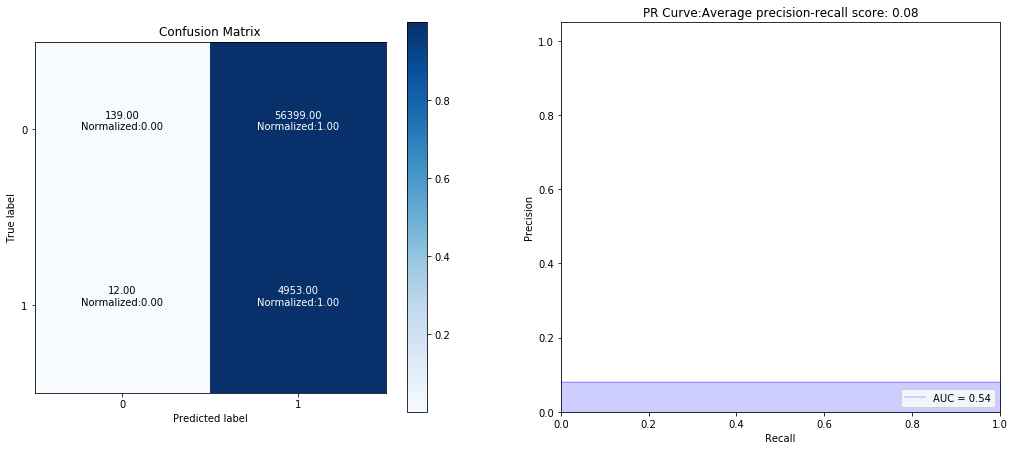

In [89]:
# Pick the best rbm model and apply classification algorithms on oversampled train data
rbm_best = BernoulliRBM(batch_size=10, learning_rate=0.001, n_components=500, n_iter=10, random_state=1, 
                verbose=True)
qca = QuadraticDiscriminantAnalysis()
qca.fit(rbm_best.fit_transform(x_train_res_app_std), y_train_res_app.ravel())
y_pred = qca.predict(rbm_best.transform(X_test_app_std))
pred_prob = qca.predict_proba(rbm_best.transform(X_test_app_std))
print("StandardScaled Over sampled Application Data - RBM + QCA Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)

StandardScaled Over sampled Application Data - RBM + Random Forest Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.44      0.60     56538
          1       0.09      0.64      0.16      4965

avg / total       0.87      0.46      0.56     61503

Accuracy: 0.45836788449343935
Weighted F1 score: 0.5647758478474759


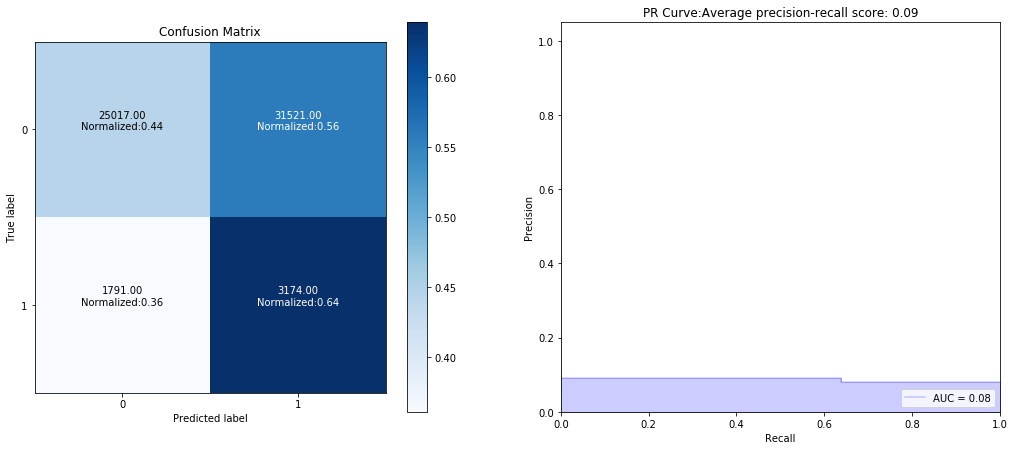

In [90]:
rfc = RandomForestClassifier()
rfc.fit(rbm_best.transform(x_train_res_app_std), y_train_res_app.ravel())
y_pred = rfc.predict(rbm_best.transform(X_test_app_std))
pred_prob = rfc.predict_proba(rbm_best.transform(X_test_app_std))
print("StandardScaled Over sampled Application Data - RBM + Random Forest Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)

StandardScaled Over sampled Application Data - RBM + AdaBoost classifier Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.44      0.60     56538
          1       0.09      0.64      0.16      4965

avg / total       0.87      0.46      0.57     61503

Accuracy: 0.4588231468383656
Weighted F1 score: 0.5652278562078118


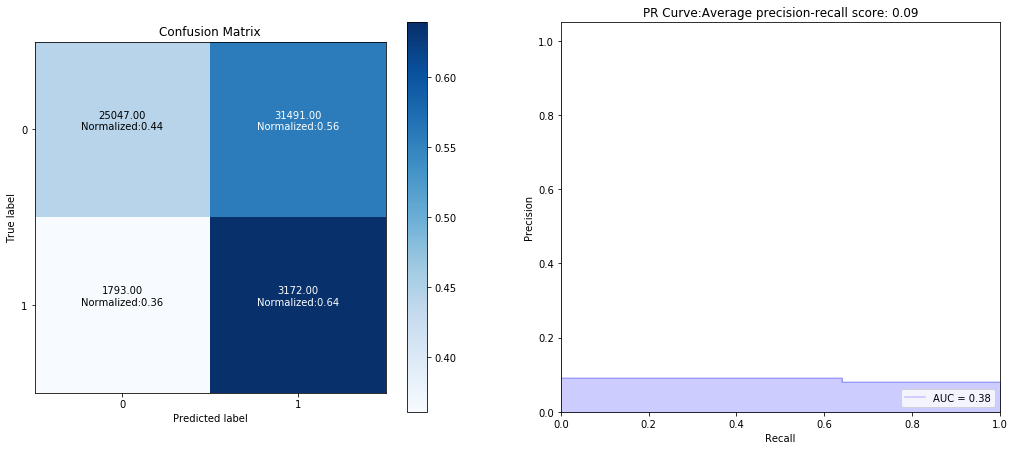

In [91]:
abc = AdaBoostClassifier()
abc.fit(rbm_best.transform(x_train_res_app_std), y_train_res_app.ravel())
y_pred = abc.predict(rbm_best.transform(X_test_app_std))
pred_prob = abc.predict_proba(rbm_best.transform(X_test_app_std))
print("StandardScaled Over sampled Application Data - RBM + AdaBoost classifier Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)

StandardScaled Over sampled Application Data - RBM + Decision Tree classifier Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.44      0.60     56538
          1       0.09      0.64      0.16      4965

avg / total       0.87      0.46      0.56     61503

Accuracy: 0.45812399395151454
Weighted F1 score: 0.5645339461080418


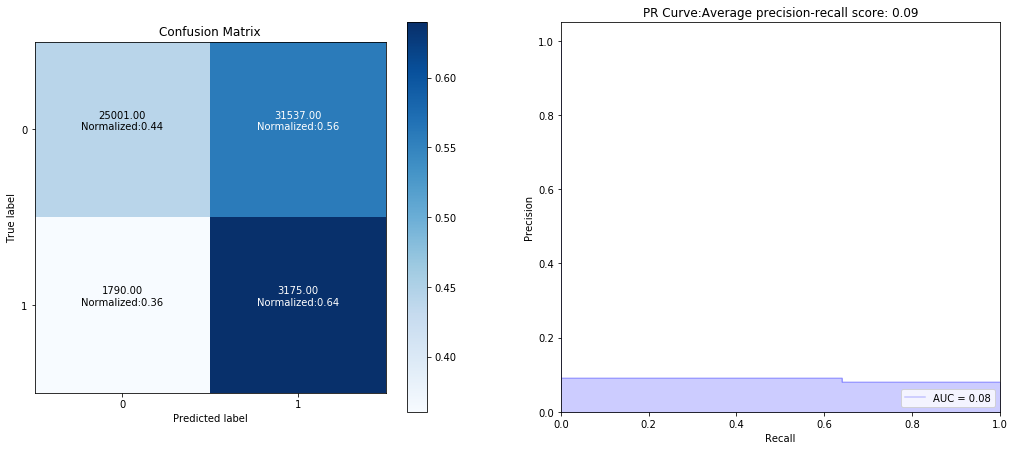

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(rbm_best.transform(x_train_res_app_std), y_train_res_app.ravel())
y_pred = dtc.predict(rbm_best.transform(X_test_app_std))
pred_prob = dtc.predict_proba(rbm_best.transform(X_test_app_std))
print("StandardScaled Over sampled Application Data - RBM + Decision Tree classifier Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)

StandardScaled Over sampled Application Data - Random Forest Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      0.99      0.96     56538
          1       0.26      0.02      0.04      4965

avg / total       0.87      0.92      0.88     61503

Accuracy: 0.9159390598832577
Weighted F1 score: 0.882159155708477


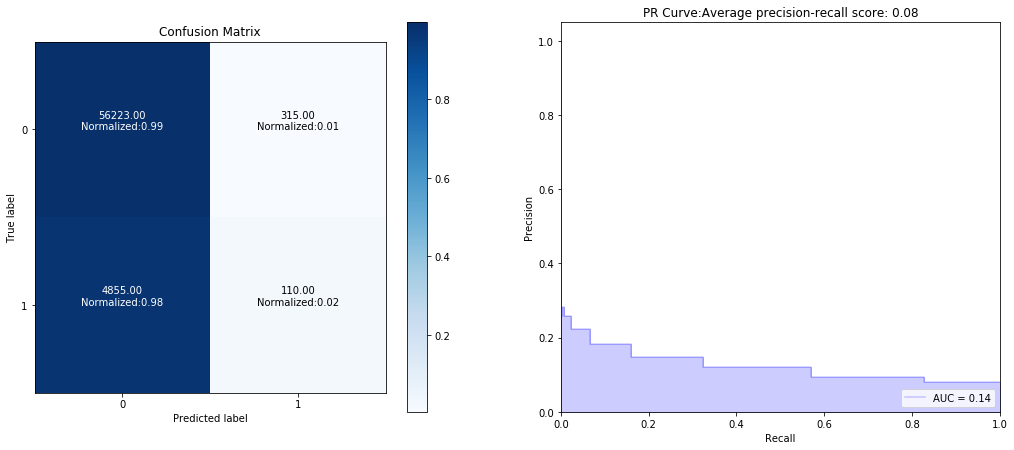

In [94]:
rfc = RandomForestClassifier()
rfc.fit(x_train_res_app_std, y_train_res_app.ravel())
y_pred = rfc.predict(X_test_app_std)
pred_prob = rfc.predict_proba(X_test_app_std)
print("StandardScaled Over sampled Application Data - Random Forest Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)

StandardScaled Over sampled Application Data - RBM + AdaBoost classifier Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.93      0.93     56538
          1       0.19      0.18      0.18      4965

avg / total       0.87      0.87      0.87     61503

Accuracy: 0.8720062435978733
Weighted F1 score: 0.8702948927189462


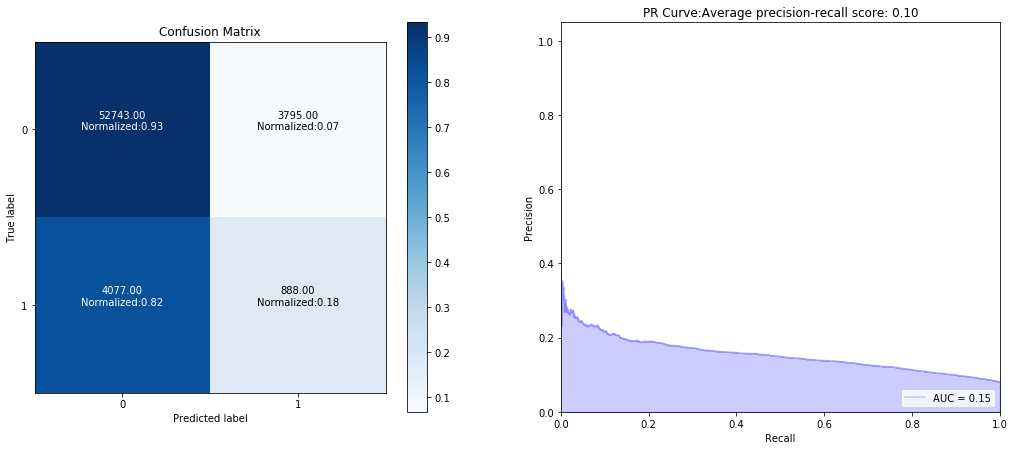

In [95]:
abc = AdaBoostClassifier()
abc.fit(x_train_res_app_std, y_train_res_app.ravel())
y_pred = abc.predict(X_test_app_std)
pred_prob = abc.predict_proba(X_test_app_std)
print("StandardScaled Over sampled Application Data - AdaBoost classifier Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)

StandardScaled Over sampled Application Data - Decision Tree classifier Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.90      0.91     56538
          1       0.14      0.18      0.16      4965

avg / total       0.86      0.84      0.85     61503

Accuracy: 0.842609303611206
Weighted F1 score: 0.852036340488078


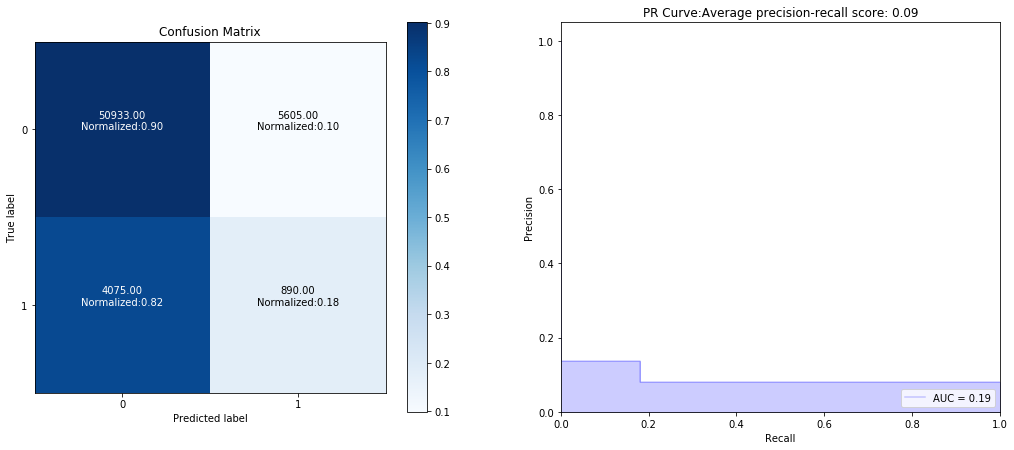

In [96]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_res_app_std, y_train_res_app.ravel())
y_pred = dtc.predict(X_test_app_std)
pred_prob = dtc.predict_proba(X_test_app_std)
print("StandardScaled Over sampled Application Data - Decision Tree classifier Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)

In [117]:
dtc = DecisionTreeClassifier()
classifier = Pipeline(steps=[('dtc', dtc)])

# perform a grid search on the learning rate, number of iterations, and number of components on the RBM 
print("SEARCHING Decision Tree's HYPER-PARAMETERS")
params = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__class_weight': [None, {0:9, 1:1}], 
    'dtc__max_features':[None, 'auto','sqrt']
}

# perform a grid search over the parameter
clf = GridSearchCV(classifier, params, n_jobs=-1, verbose=1, cv=2)
clf.fit(x_train_res_app_std, y_train_res_app.ravel())

# print diagnostic information to the user and grab the
# best model
print("best score: %0.3f" % (clf.best_score_))
print("Decision Tree's HYPER-PARAMETERS")

CV_result = clf.best_estimator_.get_params()

print("\nGrid scores on development set:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

SEARCHING Decision Tree's HYPER-PARAMETERS
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  5.5min finished


best score: 0.894
Decision Tree's HYPER-PARAMETERS

Grid scores on development set:

0.891 (+/-0.006) for {'dtc__class_weight': None, 'dtc__criterion': 'gini', 'dtc__max_features': None}
0.872 (+/-0.012) for {'dtc__class_weight': None, 'dtc__criterion': 'gini', 'dtc__max_features': 'auto'}
0.864 (+/-0.022) for {'dtc__class_weight': None, 'dtc__criterion': 'gini', 'dtc__max_features': 'sqrt'}
0.894 (+/-0.008) for {'dtc__class_weight': None, 'dtc__criterion': 'entropy', 'dtc__max_features': None}
0.879 (+/-0.016) for {'dtc__class_weight': None, 'dtc__criterion': 'entropy', 'dtc__max_features': 'auto'}
0.871 (+/-0.012) for {'dtc__class_weight': None, 'dtc__criterion': 'entropy', 'dtc__max_features': 'sqrt'}
0.881 (+/-0.005) for {'dtc__class_weight': {0: 9, 1: 1}, 'dtc__criterion': 'gini', 'dtc__max_features': None}
0.873 (+/-0.023) for {'dtc__class_weight': {0: 9, 1: 1}, 'dtc__criterion': 'gini', 'dtc__max_features': 'auto'}
0.871 (+/-0.009) for {'dtc__class_weight': {0: 9, 1: 1}, 'dtc__c

Best model: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Decision Tree classifier Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      0.90      0.91     56538
          1       0.13      0.17      0.15      4965

avg / total       0.86      0.84      0.85     61503

Accuracy: 0.8415361852267369
Weighted F1 score: 0.8507413299687953


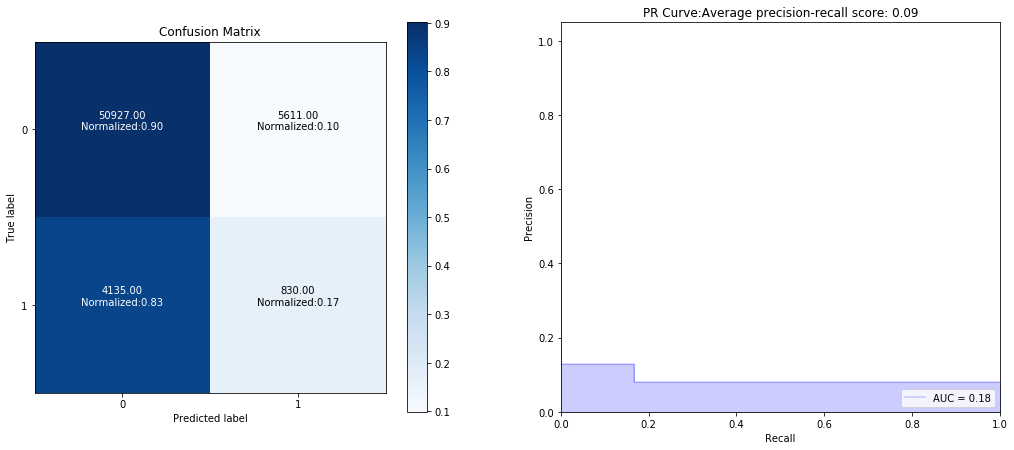

In [119]:
# Decision Tree Best Model
print("Best model:", CV_result['dtc'])
dtc = CV_result['dtc']
dtc.fit(x_train_res_app_std, y_train_res_app.ravel())
y_pred = dtc.predict(X_test_app_std)
pred_prob = dtc.predict_proba(X_test_app_std)
print("Decision Tree classifier Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)

In [123]:
rfc = RandomForestClassifier()
classifier = Pipeline(steps=[('rfc', rfc)])

# perform a grid search on the learning rate, number of iterations, and number of components on the RBM 
print("SEARCHING Random Forest's HYPER-PARAMETERS")
params = {
    'rfc__criterion': ['gini', 'entropy'],
    'rfc__bootstrap': [False, True],
    'rfc__max_features':[None, 'auto','sqrt']
}

# perform a grid search over the parameter
clf = GridSearchCV(classifier, params, n_jobs=-1, verbose=1, cv=2)
clf.fit(x_train_res_app_std, y_train_res_app.ravel())

# print diagnostic information to the user and grab the
# best model
print("best score: %0.3f" % (clf.best_score_))
print("Random Forest's HYPER-PARAMETERS")

CV_result = clf.best_estimator_.get_params()

print("\nGrid scores on development set:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

SEARCHING Random Forest's HYPER-PARAMETERS
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 41.1min finished


best score: 0.948
Random Forest's HYPER-PARAMETERS

Grid scores on development set:

0.897 (+/-0.011) for {'rfc__bootstrap': False, 'rfc__criterion': 'gini', 'rfc__max_features': None}
0.947 (+/-0.077) for {'rfc__bootstrap': False, 'rfc__criterion': 'gini', 'rfc__max_features': 'auto'}
0.948 (+/-0.078) for {'rfc__bootstrap': False, 'rfc__criterion': 'gini', 'rfc__max_features': 'sqrt'}
0.898 (+/-0.012) for {'rfc__bootstrap': False, 'rfc__criterion': 'entropy', 'rfc__max_features': None}
0.948 (+/-0.080) for {'rfc__bootstrap': False, 'rfc__criterion': 'entropy', 'rfc__max_features': 'auto'}
0.947 (+/-0.080) for {'rfc__bootstrap': False, 'rfc__criterion': 'entropy', 'rfc__max_features': 'sqrt'}
0.937 (+/-0.072) for {'rfc__bootstrap': True, 'rfc__criterion': 'gini', 'rfc__max_features': None}
0.941 (+/-0.074) for {'rfc__bootstrap': True, 'rfc__criterion': 'gini', 'rfc__max_features': 'auto'}
0.942 (+/-0.074) for {'rfc__bootstrap': True, 'rfc__criterion': 'gini', 'rfc__max_features': 'sqrt

Best model: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Random Forest classifier Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     56538
          1       0.26      0.01      0.03      4965

avg / total       0.87      0.92      0.88     61503

Accuracy: 0.9171585125928816
Weighted F1 score: 0.8817202913673693


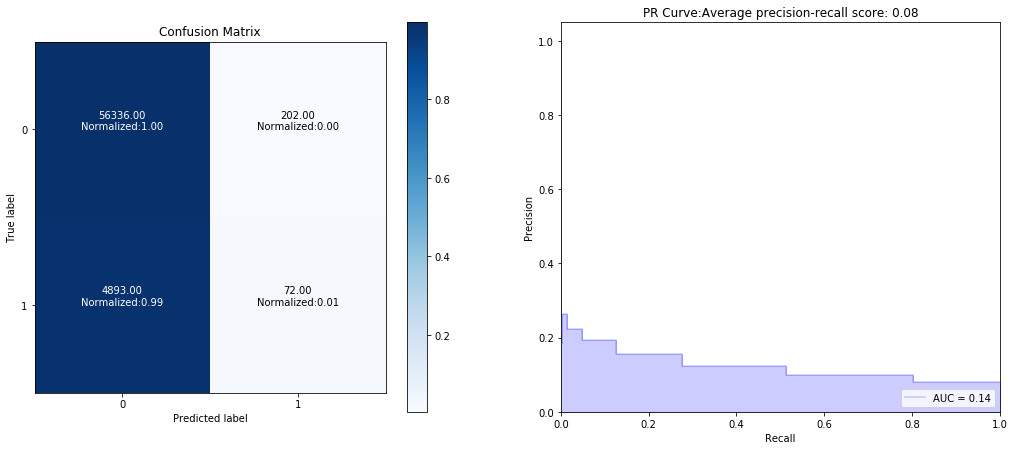

In [124]:
# Random Forest Best Model
print("Best model:", CV_result['rfc'])
rfc = CV_result['rfc']
rfc.fit(x_train_res_app_std, y_train_res_app.ravel())
y_pred = rfc.predict(X_test_app_std)
pred_prob = rfc.predict_proba(X_test_app_std)
print("Random Forest classifier Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)

Random Forest classifier Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     56538
          1       0.39      0.01      0.03      4965

avg / total       0.88      0.92      0.88     61503

Accuracy: 0.9186868933222769
Weighted F1 score: 0.8823162463087195


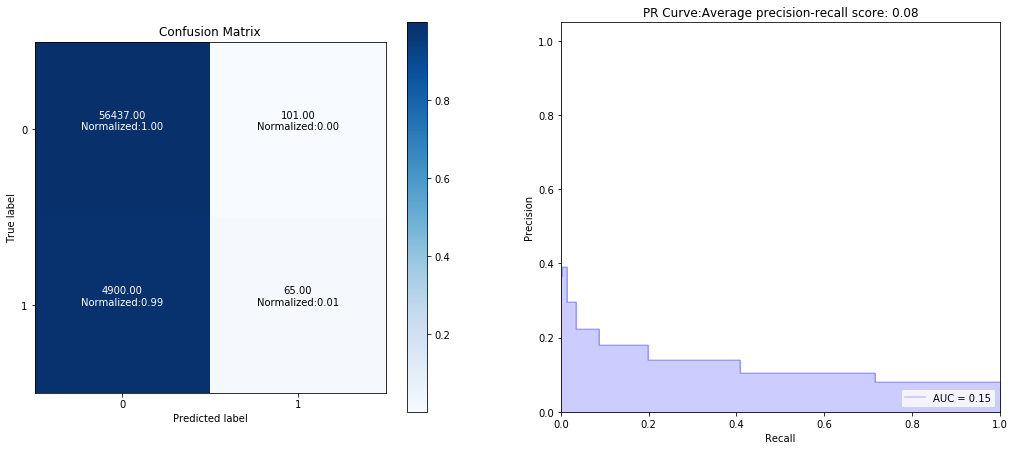

In [127]:
# Random Forest 
rfc = RandomForestClassifier(bootstrap=True, class_weight={0:91, 1:0.09}, criterion='gini')
rfc.fit(X_train_app_std, Y_train_app.ravel())
y_pred = rfc.predict(X_test_app_std)
pred_prob = rfc.predict_proba(X_test_app_std)
print("Random Forest classifier Execution : ")
classification_evaluation(Y_test_app, y_pred, pred_prob)